______________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

_______________________________________________________________________________________________________________________________________________________________________________________

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# SETTING A customized plot style,font, figure and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
HR = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
HR.shape

# We can see there are almost 1500 rows and 35 columns 

(1470, 35)

In [5]:
# As there are many columns
#To see all the columns and rows when printed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
HR.head()
# looking at the first 5 rows

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [7]:
HR.tail()

# looking at the last 5 rows

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

Our main motive is to predict the attrition based on these other features, which makes this a classification problem

In [8]:
# CHECKING THE NULL VALUES
HR.isnull().sum()

# We can see there are no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

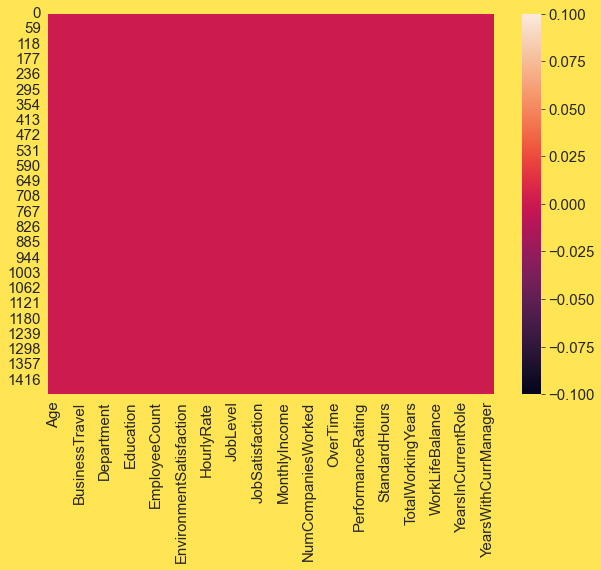

In [9]:
# plotting heatmap 
sns.heatmap(HR.isnull())

# We can see here as well, there are no null values

In [10]:
# Checking duplicates
duplicates = HR[HR.duplicated()]

In [11]:
duplicates
# There are no duplicate values

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

## EDA

In [12]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
HR.describe().T

# We can see most of the features are heavily skewed
# And outliers can be present

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [14]:
# checking the categorical features as well
HR.describe(include='O')

# We can see that Rarely travelling employees are more in the data
# And Most of the employees are working in Research & Developmen
# Most of the people had Life Sciences education field and Sales Executive job role is more
# Married people and people who don't do OT are more, which makes sense because most of the people doesn't prefer to work OT

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [15]:
HR.dtypes 

# Checking the datatypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [16]:
# Checking number of unique values in each column
HR.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [17]:
HR.shape

(1470, 35)

In [18]:
# We can see that Employee Number column has all unique values which acts as index and Employee Count,Over18 and StandardHours has only one unique value which is the same for all the rows

# So We don't get any valuable insights from these columns, nor can we use it for creating our model

# So we can drop them

In [19]:
HR.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [20]:
HR.shape

# We can observe 4 columns have been dropped, columns became 35-31 

(1470, 31)

In [21]:
# checking the unique value counts in each column

for i in HR.columns:
    print(HR[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
329     5
829     4
1469    4
267     4
217     4
1283    4
1225    4
427     4
430     4
465     4
1490    4
715     4
1146    4
1157    4
1125    4
933     4
147     4
575     4
334     4
117     4
906     4
827     4
950     4
589     4
977     4
688     4
350     4
921     4
501     3
805     3
1092    3
607     3
970     3
1179    3
303     3
1169    3
930   

### Univariate Analysis

In [22]:
# We can see the target column arrtrition has imbalance data
HR['Attrition'].value_counts()

# We will balance later while we do preprocessing

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

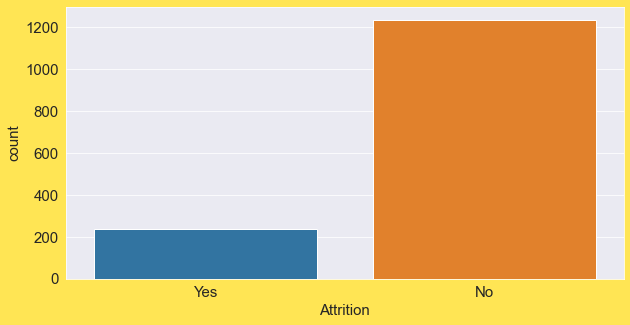

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(HR['Attrition'])

# We can also see the same thing on countplot

In [24]:
HR.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [79]:
cat_cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
cont_cols = HR[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
            'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
            'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


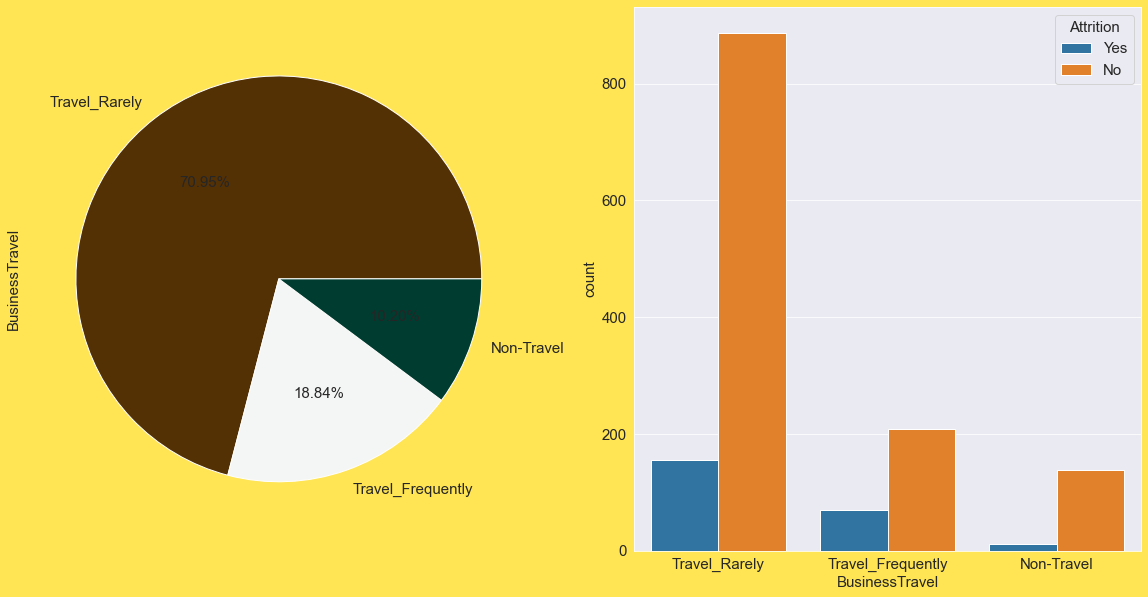

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


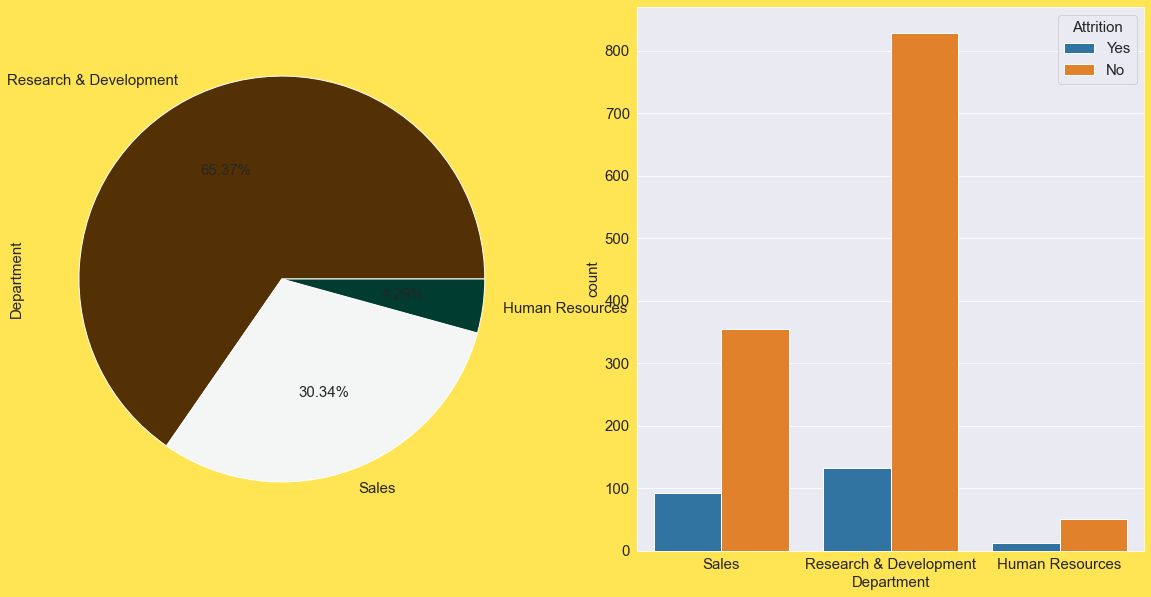

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


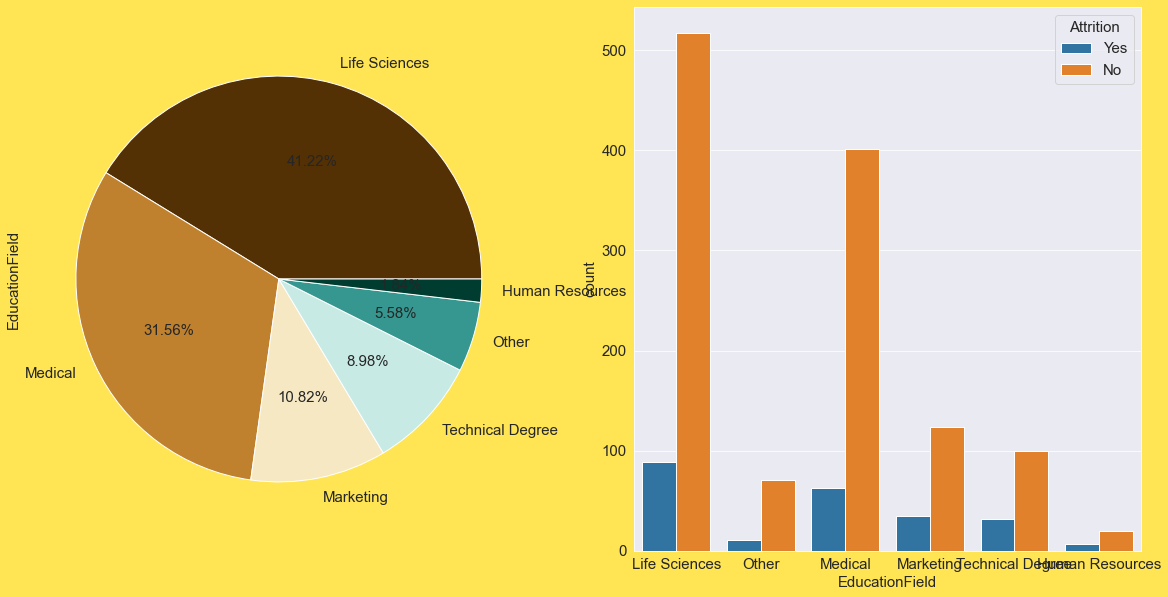

Male      882
Female    588
Name: Gender, dtype: int64


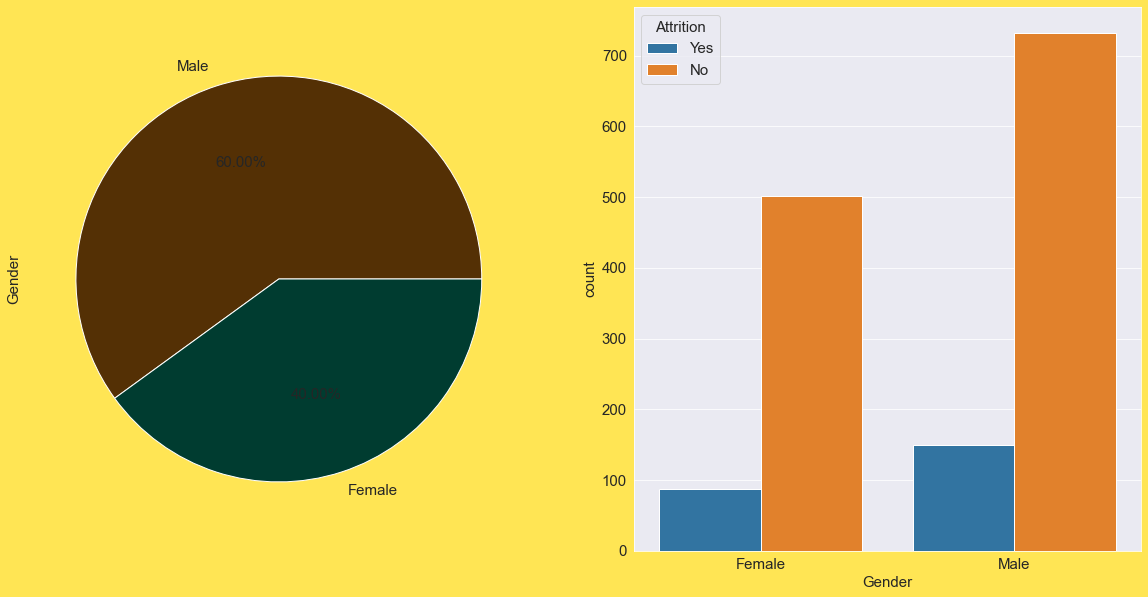

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


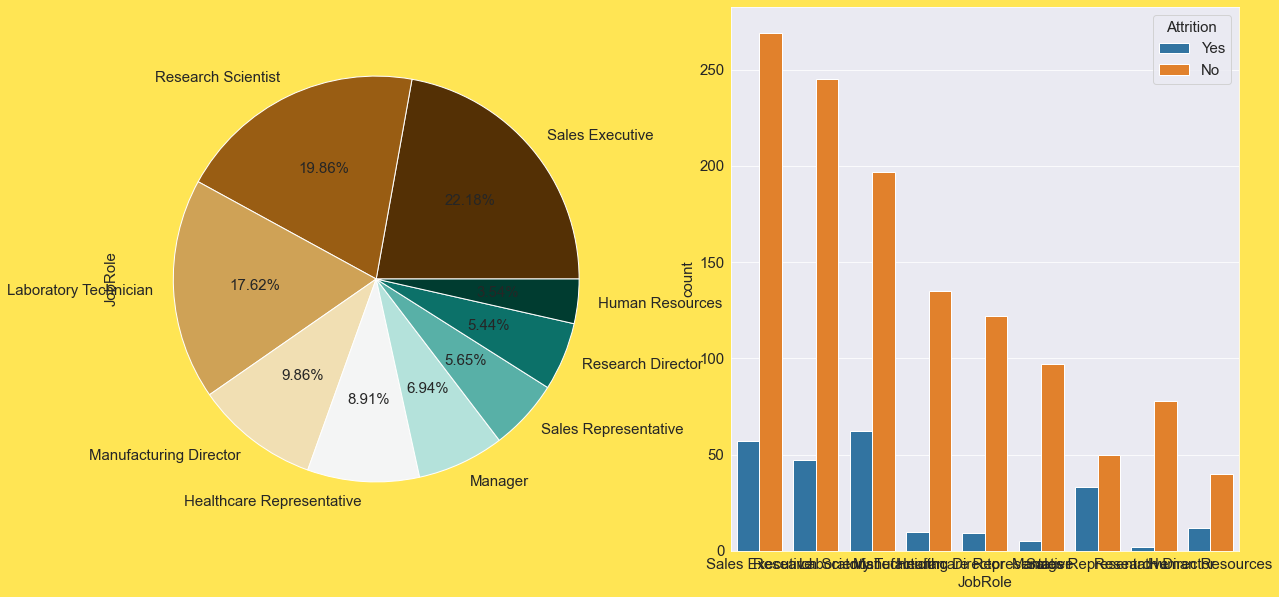

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


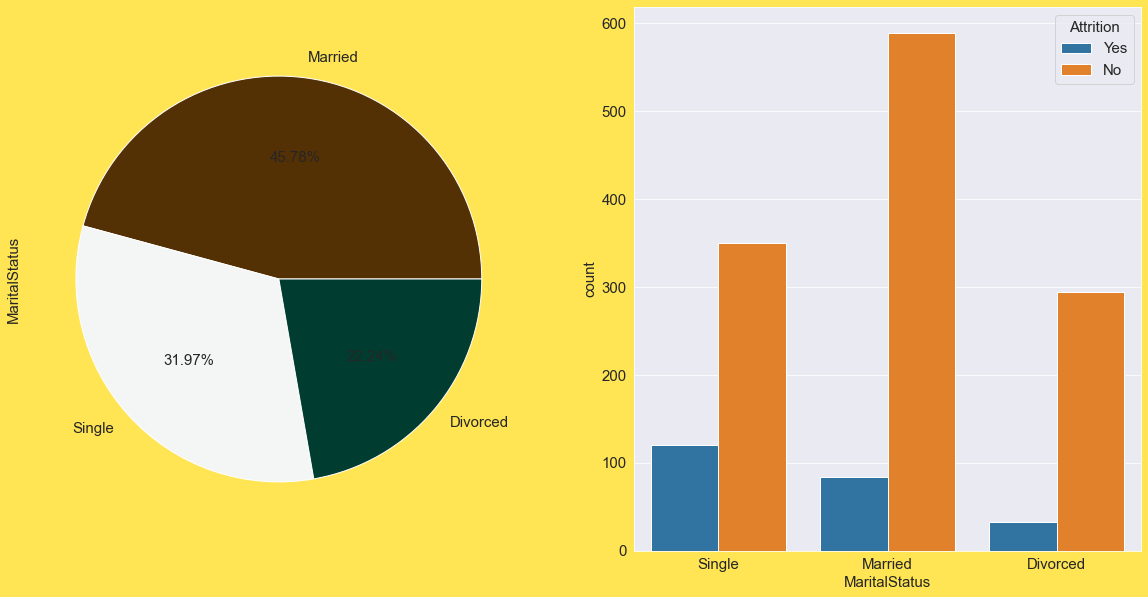

No     1054
Yes     416
Name: OverTime, dtype: int64


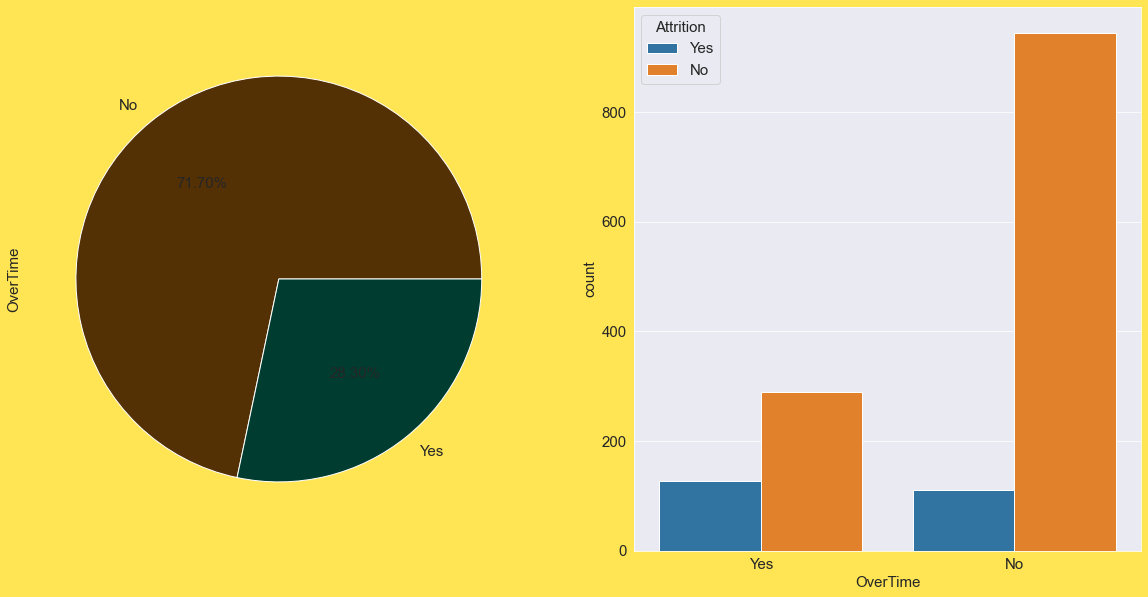

In [26]:
for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(i,hue='Attrition',data=HR)
    plt.subplot(1,2,1)
    HR[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(HR[i].value_counts())
    plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

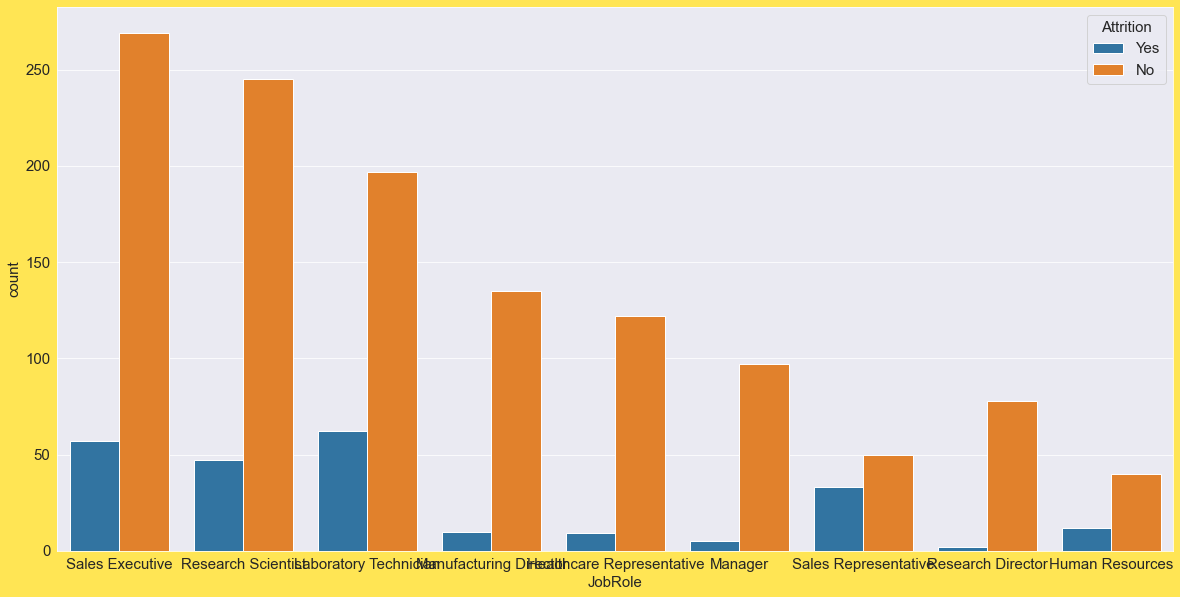

In [27]:
# Couldn't be able to see the Jobrole plot properly so increased the figure size and plotted again
plt.figure(figsize=(20,10))
sns.countplot('JobRole',hue='Attrition',data=HR)

#### Observations:-
    
-> Rarely travelling employees are large in number and attrition rate is extremely low on their part, while non travel and        frequently travel employees have least attrition rate.

-> Research and Development department has large number of employees and Attrition is very less in it and Sales department.

-> Life Sciences and Medical EducationFields have significantly low attrition rate compared to other Educationfields

-> Men has very low attrition rate than women

-> In Jobroles, We can observe Labaratory Technicians tend to have high attrition rate than significantly higher in number        Sales and Reasearch Scientists. While Sales Exceutives has very low attrition rate.

-> Single people have more attrition than married and divorced ones. However divorced people has less attrition than single        people.

-> Most of the people didn't do OT and their attrition rate is extremely low, and the ones who did OT have almost similar          attrition as the ones who didn't.

In [28]:
cont_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [29]:
HR.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

Text(0, 0.5, 'MonthlyIncome')

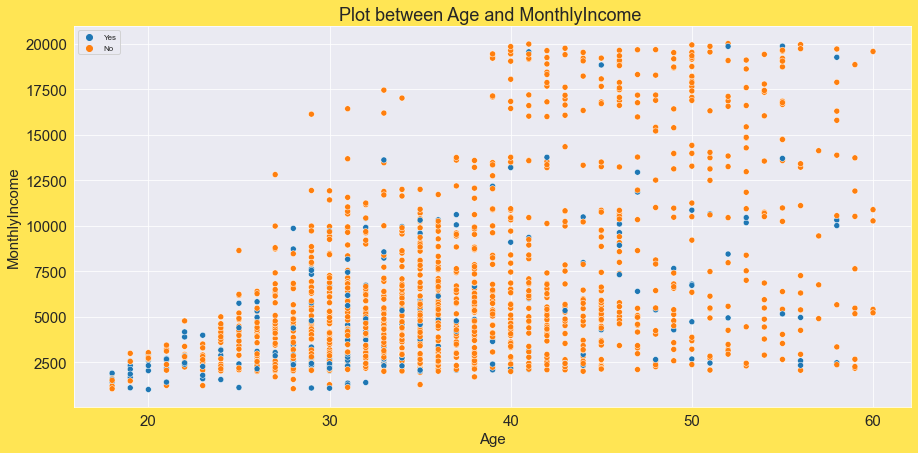

In [30]:
# looking at the distribution with respect to the target variable
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Age and MonthlyIncome ')
sns.scatterplot(x = HR['Age'],y = HR['MonthlyIncome'],hue = HR['Attrition'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')

# positive correlation between Age and monthly income and ages between 20 to 30 who have salaries between 2500 to 10000 are subjected to more attrition

Text(0, 0.5, 'YearsAtCompany')

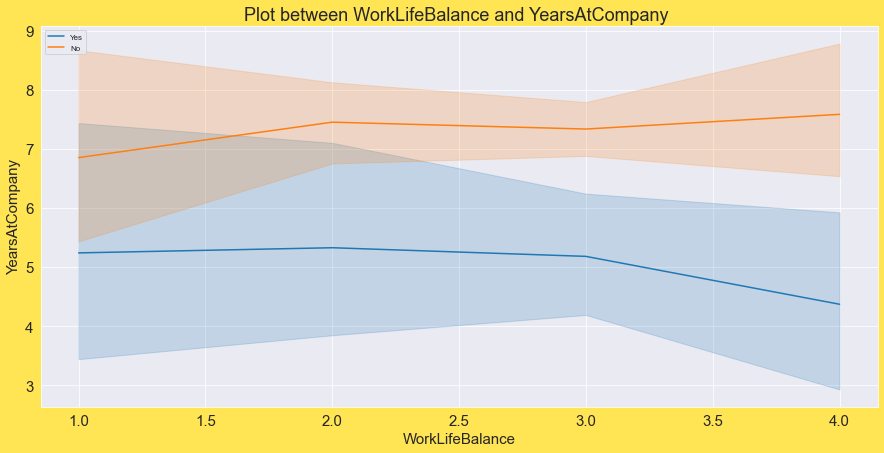

In [31]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between WorkLifeBalance and YearsAtCompany ')
sns.lineplot(x = HR['WorkLifeBalance'],y = HR['YearsAtCompany'],hue = HR['Attrition'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('WorkLifeBalance')
plt.ylabel('YearsAtCompany')

# for people who are in the company for more than 5.5 years shows no attrition
# For people who are in the companhy for less than 5 years shows attrition

Text(0, 0.5, 'DailyRate')

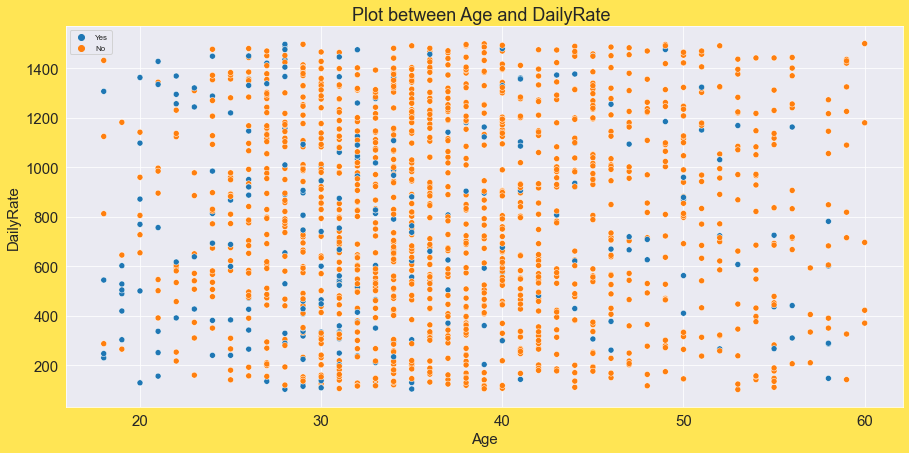

In [32]:
# looking at the distribution with respect to the target variable
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Age and DailyRate ')
sns.scatterplot(x = HR['Age'],y = HR['DailyRate'],hue = HR['Attrition'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Age')
plt.ylabel('DailyRate')

# Employees who are less in age and having high DailyRate time are having higher attrition


Text(0, 0.5, 'StockOptionLevel')

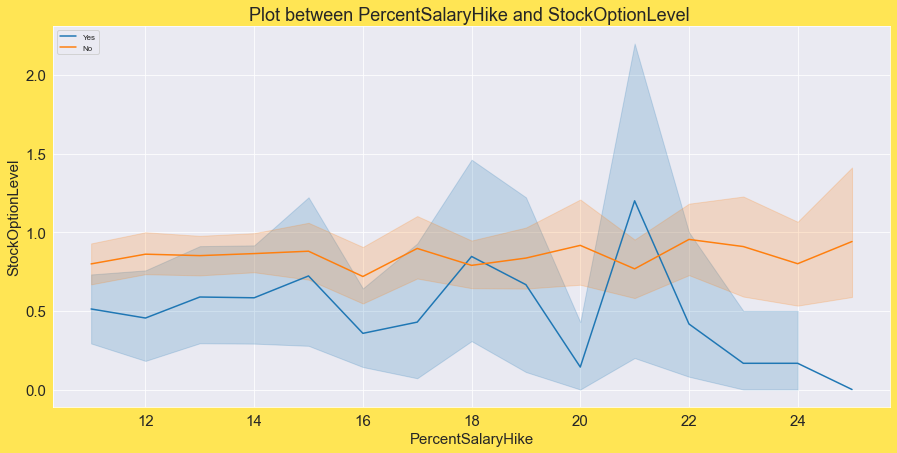

In [33]:
# looking at the distribution with respect to the target variable
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between PercentSalaryHike and StockOptionLevel ')
sns.lineplot(x = HR['PercentSalaryHike'],y = HR['StockOptionLevel'],hue = HR['Attrition'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('PercentSalaryHike')
plt.ylabel('StockOptionLevel')

# Even though there is high Stockoption level and salaryhike some employees are still leaving the company

Text(0, 0.5, 'StockOptionLevel')

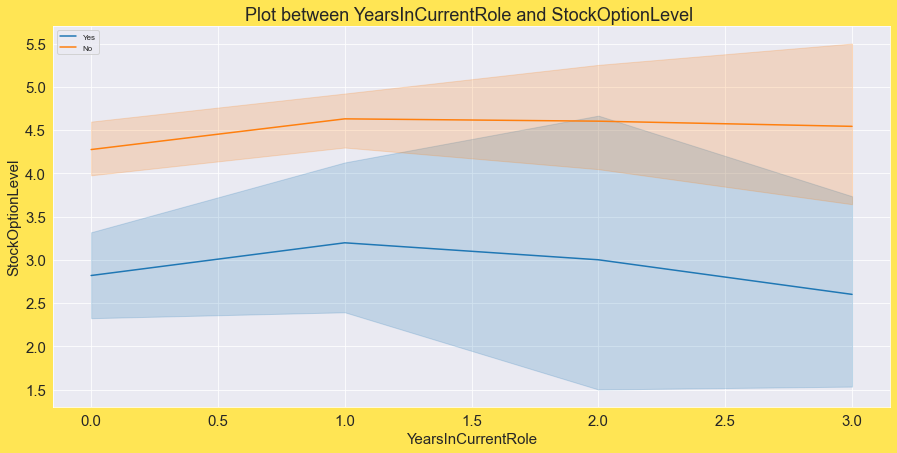

In [34]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between YearsInCurrentRole and StockOptionLevel ')
sns.lineplot(x = HR['StockOptionLevel'],y = HR['YearsInCurrentRole'],hue = HR['Attrition'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('YearsInCurrentRole')
plt.ylabel('StockOptionLevel')

# If the currentyears in comapny is more then there is attrition is not present irrspective of the stockoption level

Text(0, 0.5, 'StockOptionLevel')

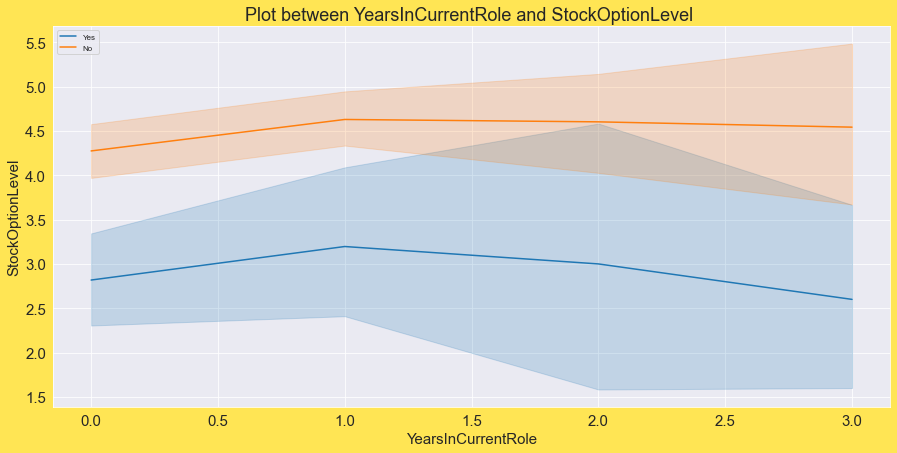

In [35]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between YearsInCurrentRole and StockOptionLevel ')
sns.lineplot(x = HR['StockOptionLevel'],y = HR['YearsInCurrentRole'],hue = HR['Attrition'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('YearsInCurrentRole')
plt.ylabel('StockOptionLevel')


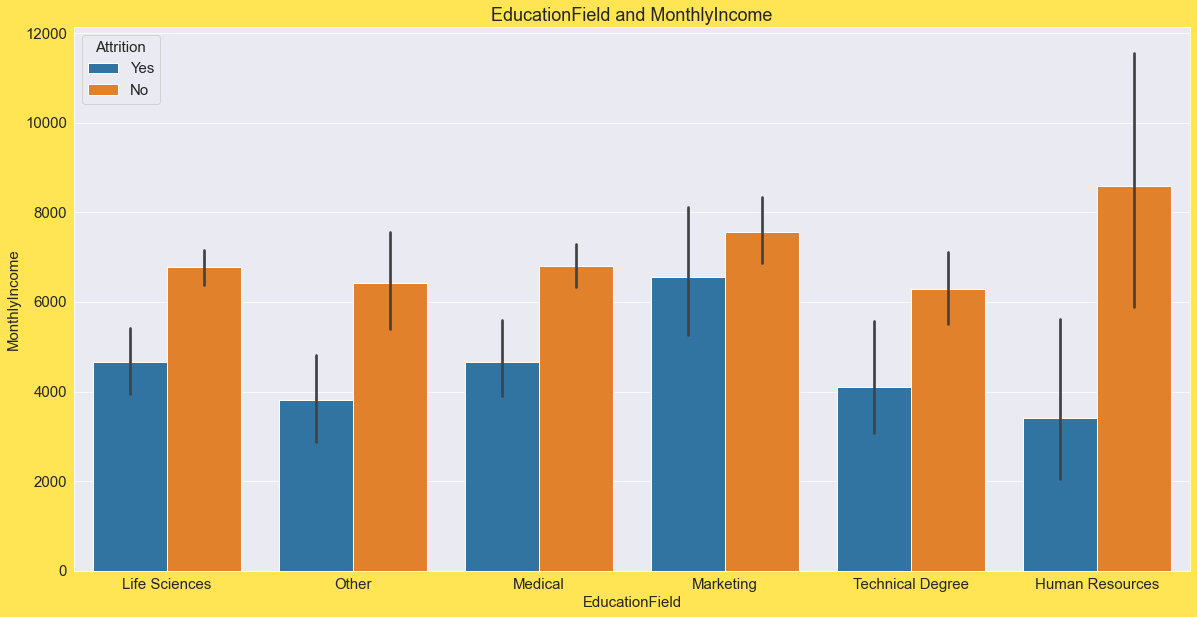

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationField',y='MonthlyIncome',hue='Attrition',data=HR)
plt.title('EducationField and MonthlyIncome')
plt.show()

# Human Resources EducationField Employees are highly paid

### For Further Analysis We should encode the categorical variables

In [37]:
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [38]:
# for further analysis we are encoding the target Attrition using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
HR['Attrition']= le.fit_transform(HR['Attrition'])

In [39]:
HR['Attrition'].head()

# We can see attrition is encoded

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [40]:
HR.Attrition.value_counts()

# 0 is for No and 1 is for yes

0    1233
1     237
Name: Attrition, dtype: int64

In [41]:
HR.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [42]:
# Calaculating the % for each categorical variable

for i in cat_cols:
    print(HR.groupby(i)['Attrition'].mean()*100)
    print('\n')
    
# We can observe frequently travelling employees and working in Sales Department are having more attrition rate.
# Interesting employees who has HR education field has more attrition.
# Men has slighltly more attrition than women.
# Sales Representative role has significantly higher attrition rate than other job roles.
# And Single employees tend to leave from company more often, which makes sense because married people doesn't really fluke between companies easily

BusinessTravel
Non-Travel            8.000000
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Name: Attrition, dtype: float64


Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: Attrition, dtype: float64


EducationField
Human Resources     25.925926
Life Sciences       14.686469
Marketing           22.012579
Medical             13.577586
Other               13.414634
Technical Degree    24.242424
Name: Attrition, dtype: float64


Gender
Female    14.795918
Male      17.006803
Name: Attrition, dtype: float64


JobRole
Healthcare Representative     6.870229
Human Resources              23.076923
Laboratory Technician        23.938224
Manager                       4.901961
Manufacturing Director        6.896552
Research Director             2.500000
Research Scientist           16.095890
Sales Executive              17.484663
Sales Representative         39.759036
Name: Attrition, dtype: float64


Ma

In [44]:
# looking at the pivot table between Gender and Jobrole comparing the attrition rate
HR.pivot_table('Attrition',index='Gender',columns='JobRole')*100

# We can obsereve there is alot of attrition in women in HR and Sales Representative jobroles.

JobRole  Healthcare Representative  Human Resources  Laboratory Technician  \
Gender                                                                       
Female                    9.803922        37.500000              18.823529   
Male                      5.000000        16.666667              26.436782   

JobRole   Manager  Manufacturing Director  Research Director  \
Gender                                                         
Female   4.255319                5.555556           3.030303   
Male     5.454545                8.219178           2.127660   

JobRole  Research Scientist  Sales Executive  Sales Representative  
Gender                                                              
Female            14.912281        15.151515             42.105263  
Male              16.853933        19.072165             37.777778

<AxesSubplot:xlabel='Gender'>

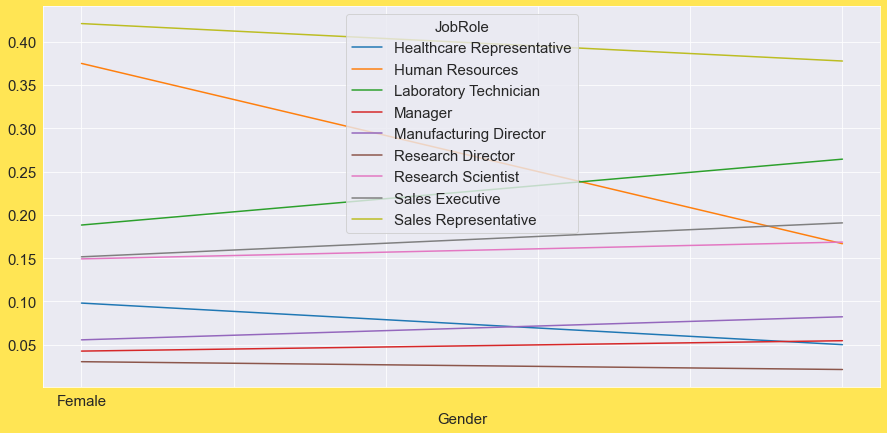

In [45]:
HR.pivot_table('Attrition',index='Gender',columns='JobRole').plot()

# We can see the same thing here with a plot


MaritalStatus  Divorced   Married    Single
OverTime                                   
No             0.061404  0.084189  0.162242
Yes            0.191919  0.231183  0.496183




<AxesSubplot:xlabel='OverTime'>

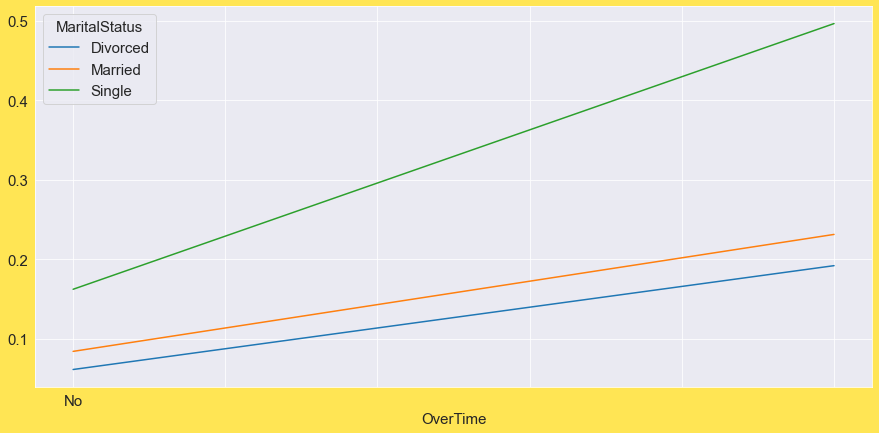

In [48]:
print(HR.pivot_table('Attrition',index='OverTime',columns='MaritalStatus'))
print('\n')
HR.pivot_table('Attrition',index='OverTime',columns='MaritalStatus').plot()

# We can see that employees who are single and does OT have significantly higher attrition rate

RelationshipSatisfaction         1         2         3         4
MaritalStatus                                                   
Divorced                  0.134615  0.093333  0.063063  0.134831
Married                   0.163121  0.072993  0.127451  0.130890
Single                    0.325301  0.307692  0.263889  0.177632




<AxesSubplot:xlabel='MaritalStatus'>

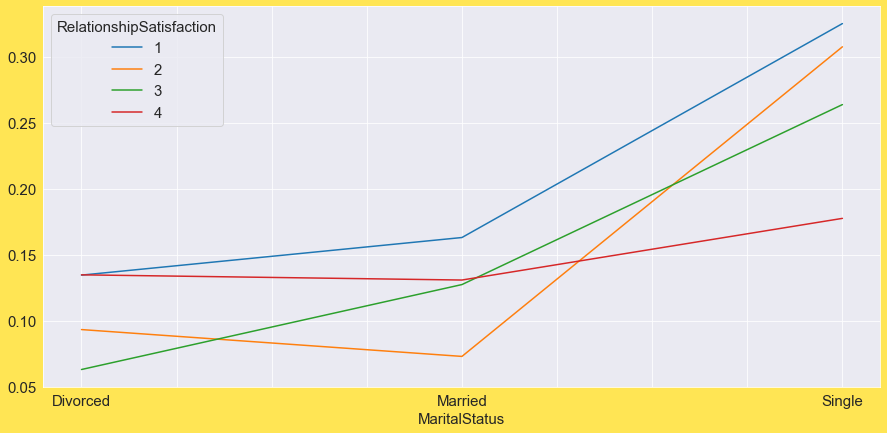

In [49]:
print(HR.pivot_table('Attrition',index='MaritalStatus',columns='RelationshipSatisfaction'))
print('\n')
HR.pivot_table('Attrition',index='MaritalStatus',columns='RelationshipSatisfaction').plot()

# We can see that as the RelationshipSatisfaction increases attrition decreases

JobSatisfaction                1         2         3         4
Department                                                    
Human Resources         0.454545  0.100000  0.200000  0.117647
Research & Development  0.197917  0.137931  0.143333  0.094915
Sales                   0.267442  0.232558  0.212598  0.149660




<AxesSubplot:xlabel='Department'>

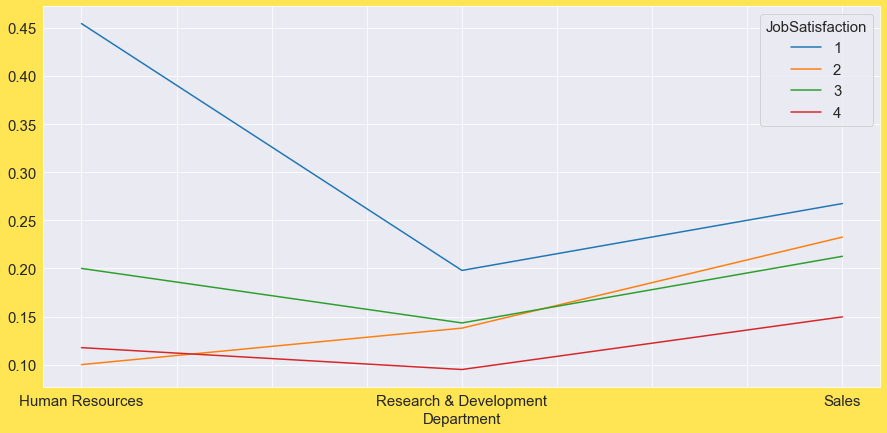

In [50]:
print(HR.pivot_table('Attrition',index='Department',columns='JobSatisfaction'))
print('\n')
HR.pivot_table('Attrition',index='Department',columns='JobSatisfaction').plot()

# We can see R and D has very low attrition rate
# And we can say job satisfaction is more in HR and R&D departments

### Encoding the categorical features

In [52]:
cat_cols

# There is no order in these categories which makes them nomial data
# So, for that we cannot use Label and Ordinal Encoding methods
# We will use OneHotEncoder

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # We are dropping one dummy column from each encoded feature to avoid multicollinearity

df_object = HR.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(cat_cols)

HR_en = pd.concat([HR.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [54]:
HR_en.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   
3                        3                     0   
4                        2                     2   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3  

In [59]:
HR.shape

(1470, 31)

In [58]:
HR_en.shape # We have got 14 new columns after encoding

(1470, 45)

Age                                     AxesSubplot(0.125,0.826831;0.168478x0.053169)
Attrition                            AxesSubplot(0.327174,0.826831;0.168478x0.053169)
DailyRate                            AxesSubplot(0.529348,0.826831;0.168478x0.053169)
DistanceFromHome                     AxesSubplot(0.731522,0.826831;0.168478x0.053169)
Education                               AxesSubplot(0.125,0.763028;0.168478x0.053169)
EnvironmentSatisfaction              AxesSubplot(0.327174,0.763028;0.168478x0.053169)
HourlyRate                           AxesSubplot(0.529348,0.763028;0.168478x0.053169)
JobInvolvement                       AxesSubplot(0.731522,0.763028;0.168478x0.053169)
JobLevel                                AxesSubplot(0.125,0.699225;0.168478x0.053169)
JobSatisfaction                      AxesSubplot(0.327174,0.699225;0.168478x0.053169)
MonthlyIncome                        AxesSubplot(0.529348,0.699225;0.168478x0.053169)
MonthlyRate                          AxesSubplot(0.731

<Figure size 1800x720 with 0 Axes>

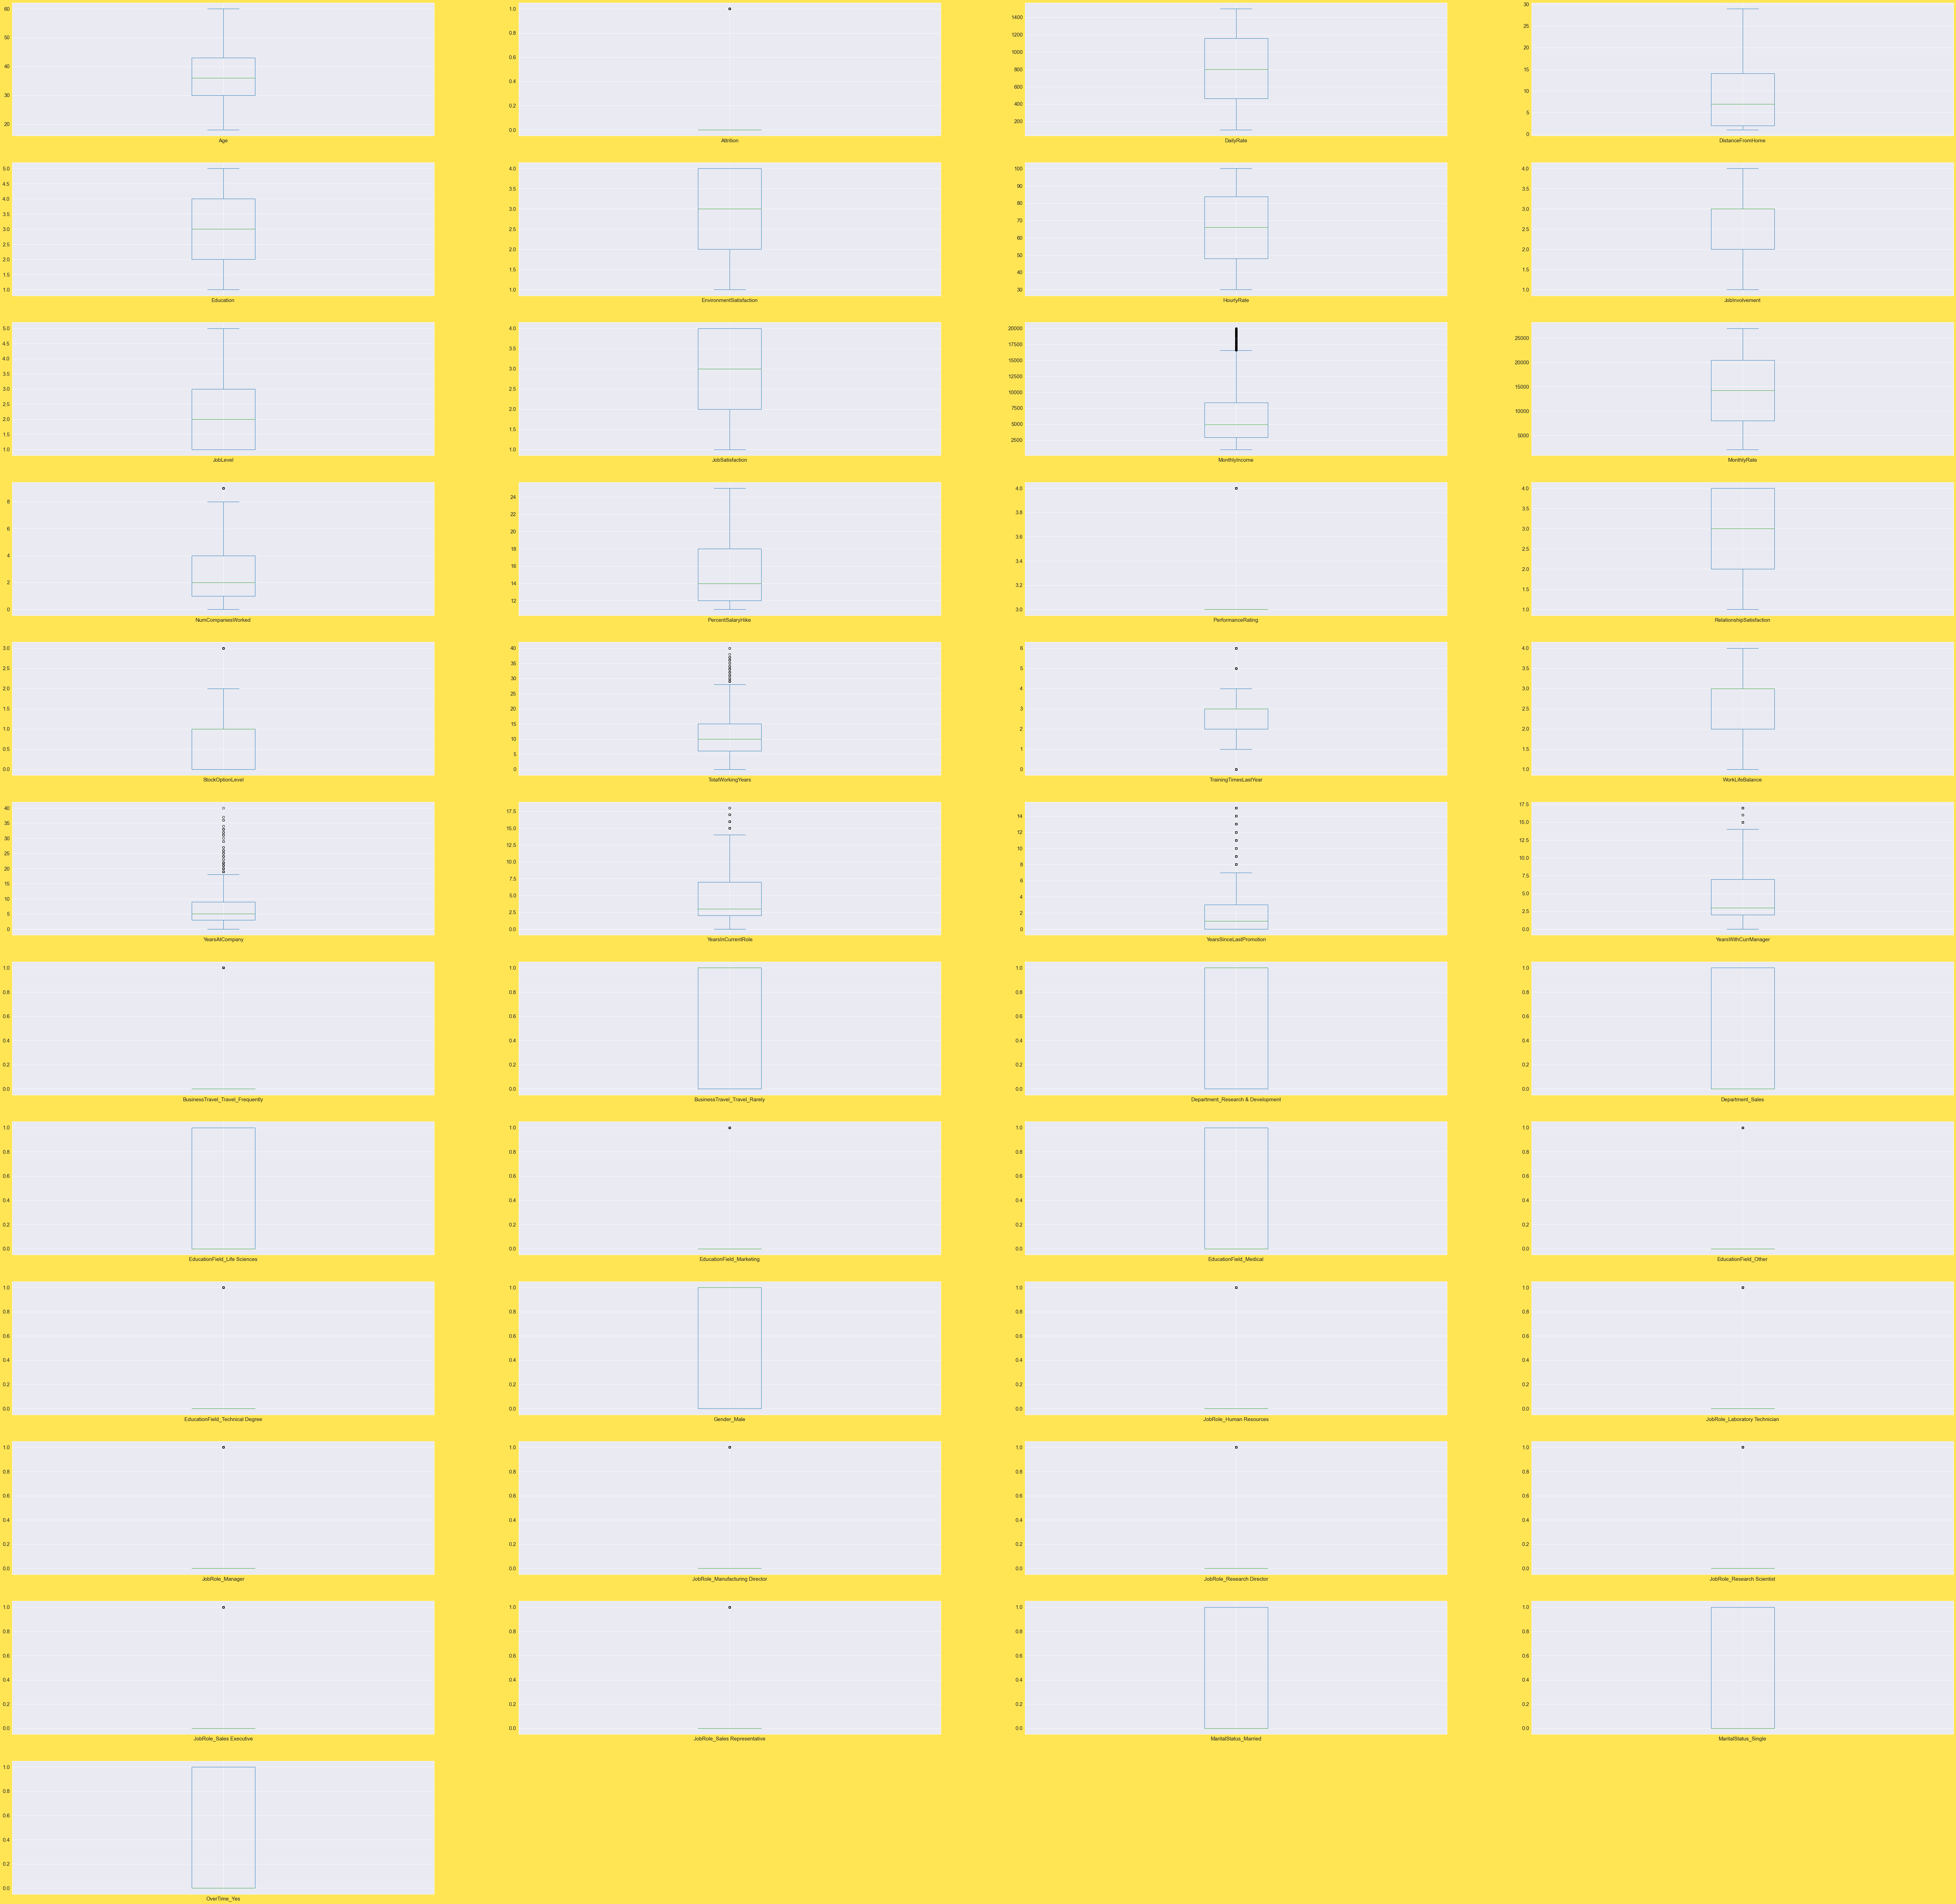

In [77]:
# visually checking the outliers 
plt.figure(figsize=(25,10))
HR_en.plot(kind ='box',subplots = True, layout =(12,4),sharex = False,figsize=(100,100))

In [ ]:
# we can see there are few outliers in some columns
# Removing the outliers

In [81]:
from scipy.stats import zscore

out_cols = HR_en[["MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]

z=np.abs(zscore(out_cols))

print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([7, 6, 4, 6, 5, 6, 2, 2, 4, 6, 5, 6, 7, 2, 4, 6, 7, 6, 2, 7, 4, 5,
       6, 5, 7, 4, 6, 2, 4, 5, 6, 6, 7, 2, 4, 4, 6, 6, 2, 5, 4, 4, 6, 4,
       7, 6, 4, 2, 4, 6, 7, 2, 7, 4, 6, 4, 7, 6, 5, 5, 4, 6, 6, 6, 4, 6,
       6, 7, 2, 4, 6, 4, 6, 6

In [82]:
HR_new=HR_en[(z<3).all(axis=1)]

In [83]:
print("shape before and after")
print("shape before: ", HR_en.shape)
print("shape after: ", HR_new.shape)
print("Percentage Loss: ", (HR_en.shape[0]-HR_new.shape[0])/HR_en.shape[0]*100)

# The data loss is around 5.6% we can go ahead and remove the outliers

shape before and after
shape before:  (1470, 45)
shape after:  (1387, 45)
Percentage Loss:  5.646258503401361


In [85]:
# Checking with IQR method as well
Q1=out_cols.quantile(0.25)
Q3=out_cols.quantile(0.75)
IQR=Q3 - Q1

HR_new_quant = HR_en[~((HR_en < (Q1 - 1.5 * IQR)) |(HR_en > (Q3 + 1.5 * IQR))).any(axis=1)]

In [86]:
print("shape before and after")
print("shape before: ", HR_en.shape)
print("shape after: ", HR_new_quant.shape)
print("Percentage Loss: ", (HR_en.shape[0]-HR_new_quant.shape[0])/HR_en.shape[0]*100)

# We can see that the data loss is more using IQR method so we choose zscore method

shape before and after
shape before:  (1470, 45)
shape after:  (985, 45)
Percentage Loss:  32.99319727891156


In [87]:
HR_new.shape

(1387, 45)

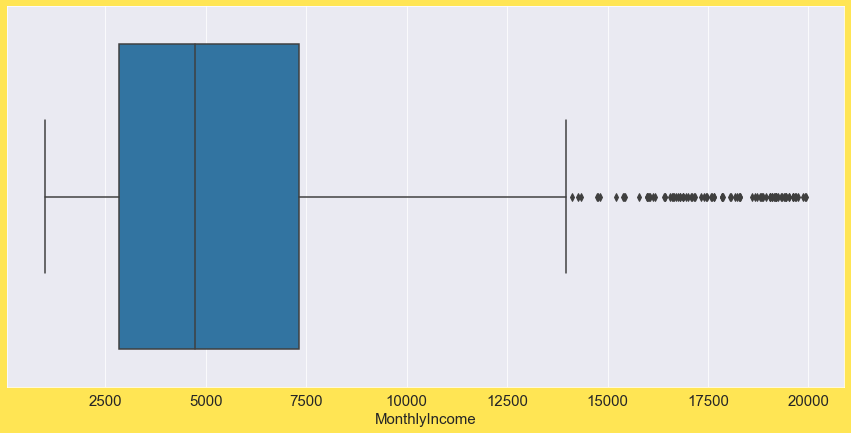

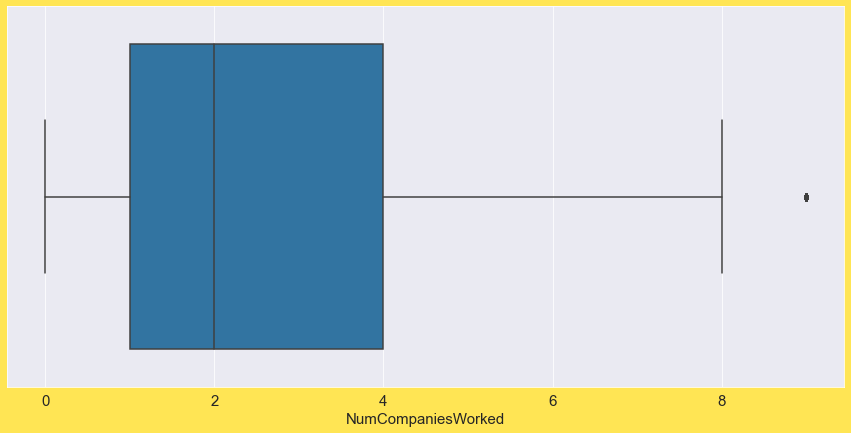

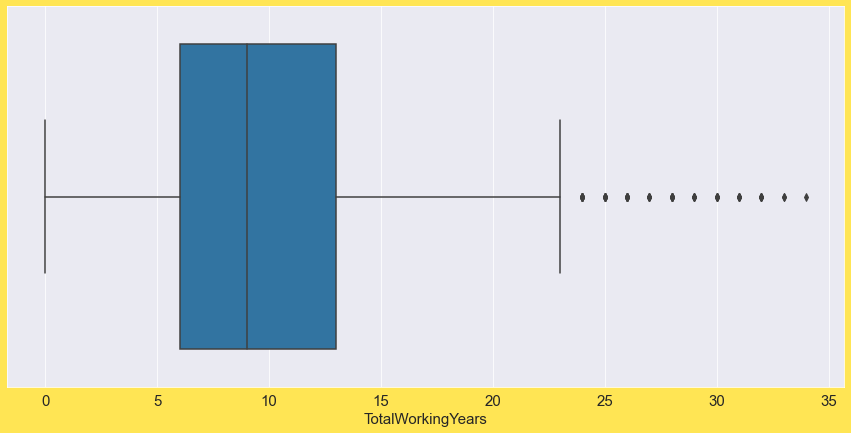

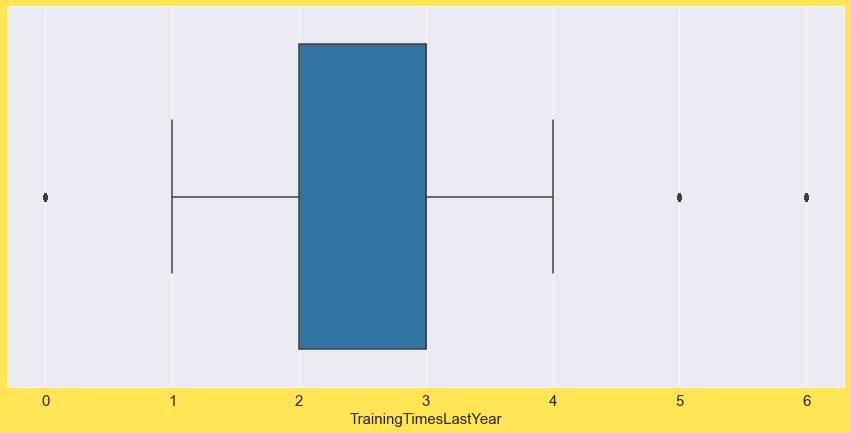

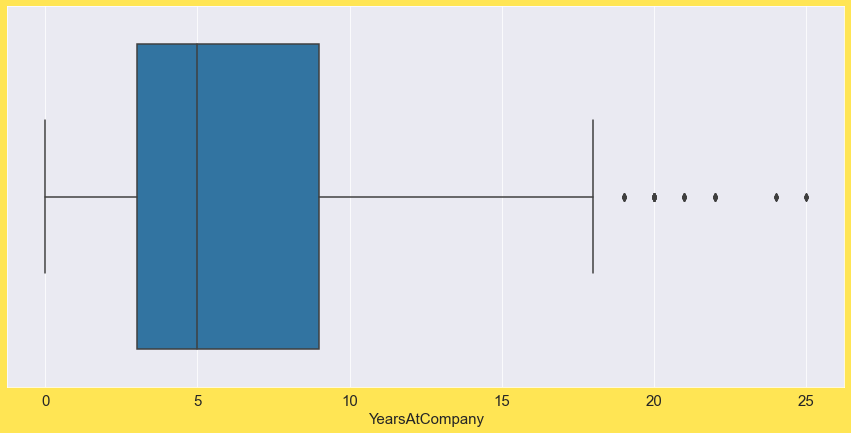

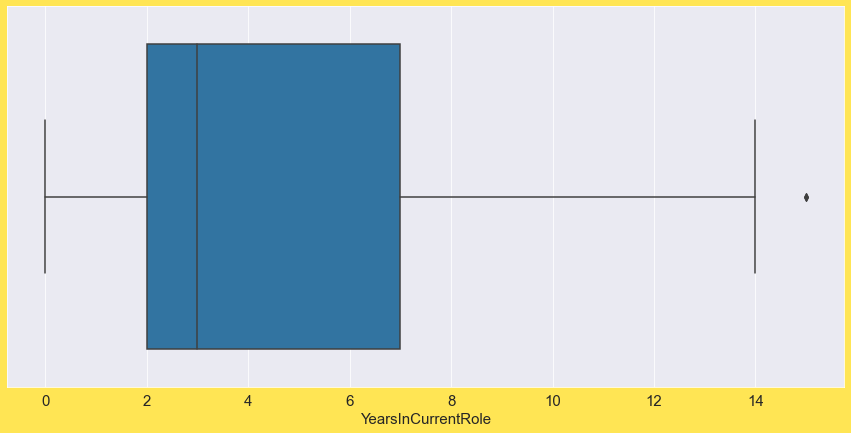

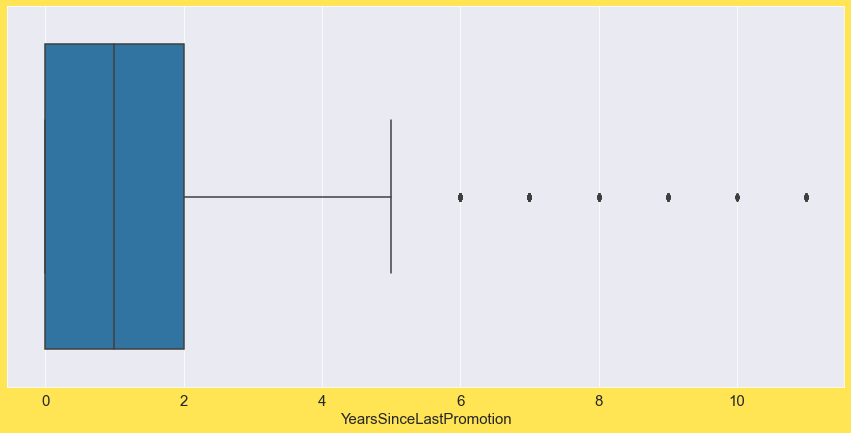

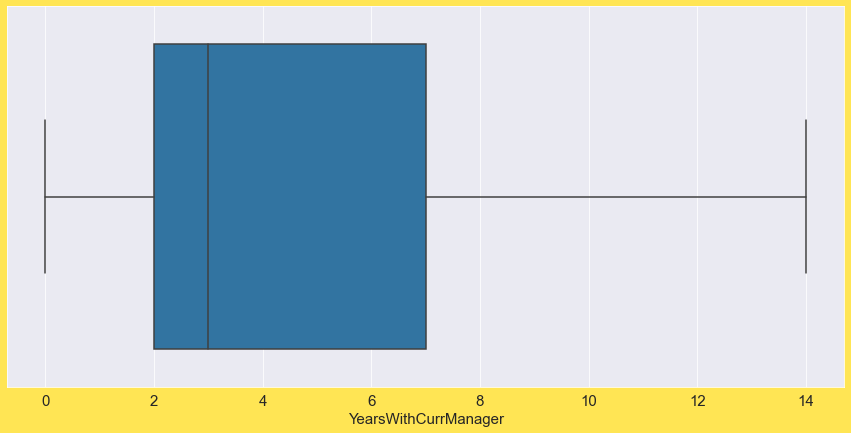

In [95]:
# Checking the outliers again
for i in out_cols.columns:
    sns.boxplot(HR_new[i])
    plt.show()
     
# We can see that the outliers have been removed

In [96]:
# CHECKING AND TREATING SKEWNESS

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabe

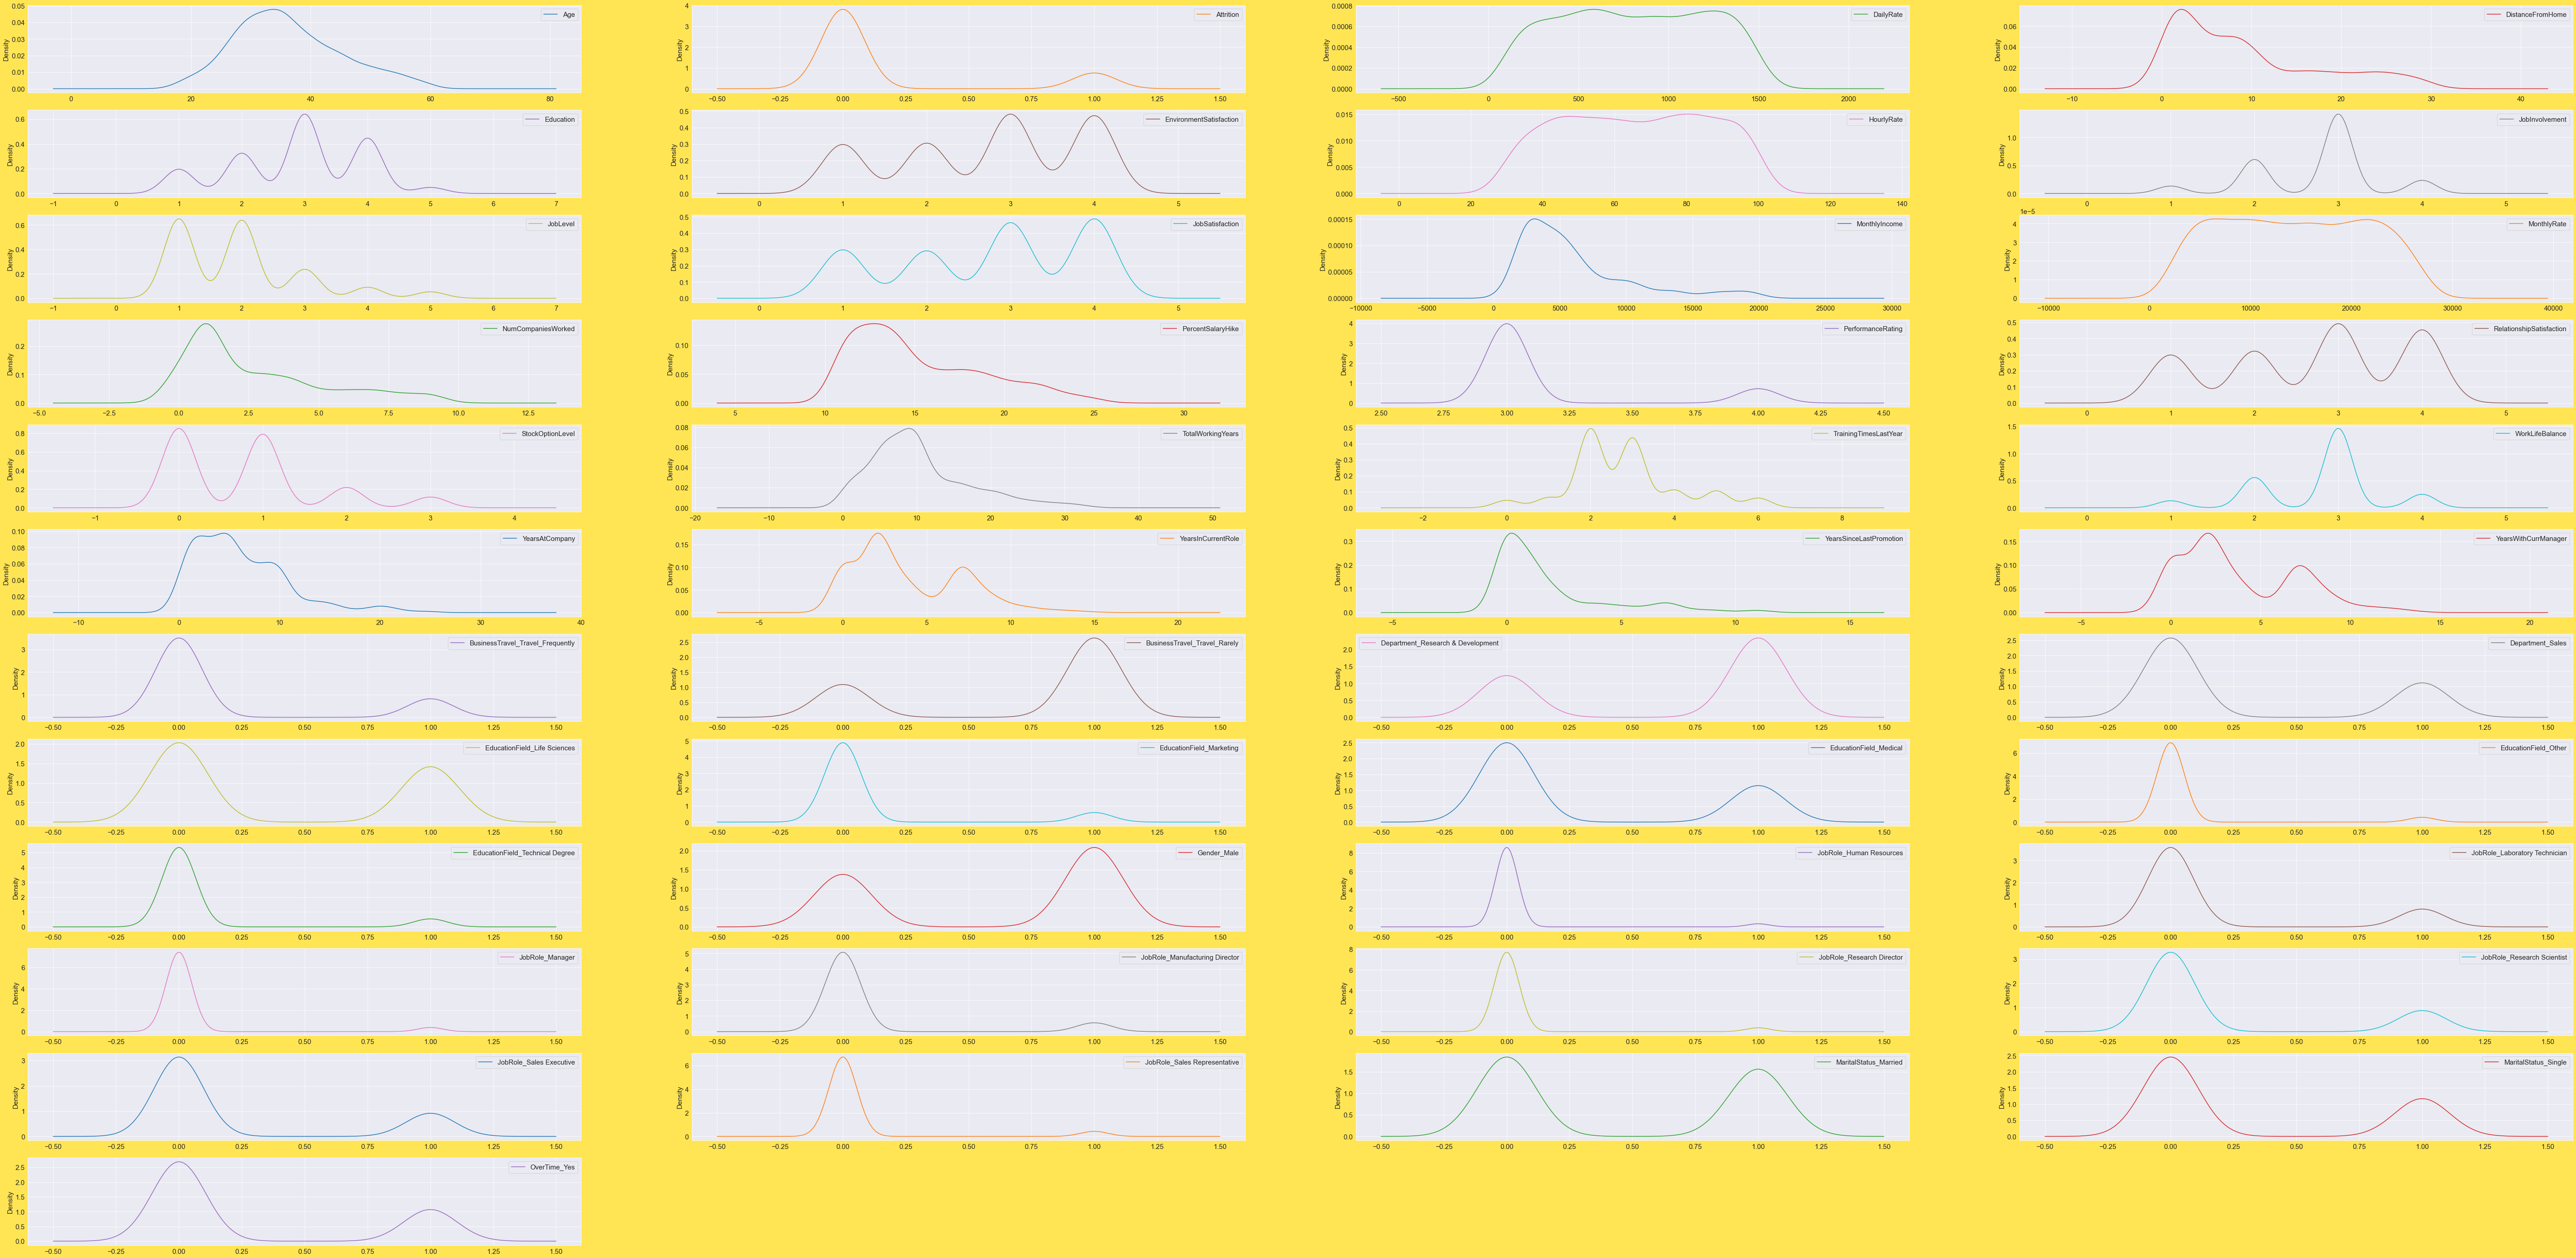

In [102]:
# plotting to see skewed columns
HR_new.plot(kind ='kde',subplots = True, layout =(12,4),sharex = False,figsize=(100,50))

# We can see there high amount of skewness is present in some of the columns

In [103]:
HR_new.skew().sort_values()

BusinessTravel_Travel_Rarely        -0.912096
Department_Research & Development   -0.654563
WorkLifeBalance                     -0.557100
JobInvolvement                      -0.501401
Gender_Male                         -0.417296
JobSatisfaction                     -0.345612
EnvironmentSatisfaction             -0.325285
RelationshipSatisfaction            -0.295686
Education                           -0.289024
HourlyRate                          -0.030481
DailyRate                           -0.017078
MonthlyRate                          0.030596
MaritalStatus_Married                0.166579
EducationField_Life Sciences         0.362342
Age                                  0.472280
TrainingTimesLastYear                0.577614
YearsWithCurrManager                 0.694506
YearsInCurrentRole                   0.726675
MaritalStatus_Single                 0.761376
EducationField_Medical               0.797049
PercentSalaryHike                    0.800592
Department_Sales                  

In [104]:
# 
skewed_cols = ["DistanceFromHome","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [105]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [107]:
HR_new[skewed_cols] = pt.fit_transform(HR_new[skewed_cols].values)

In [108]:
HR_new[skewed_cols].skew()

# We can see that skewness has been removed

DistanceFromHome          -0.008149
MonthlyIncome              0.027700
NumCompaniesWorked         0.016175
PercentSalaryHike          0.112128
TotalWorkingYears         -0.009666
TrainingTimesLastYear      0.057949
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

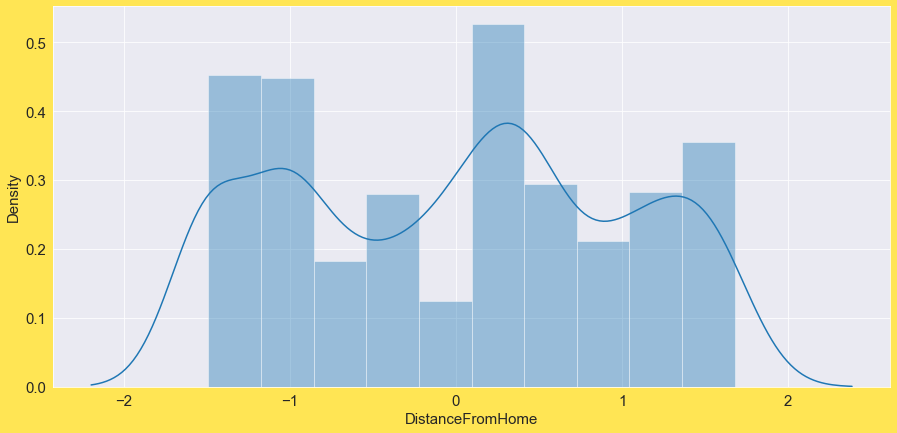

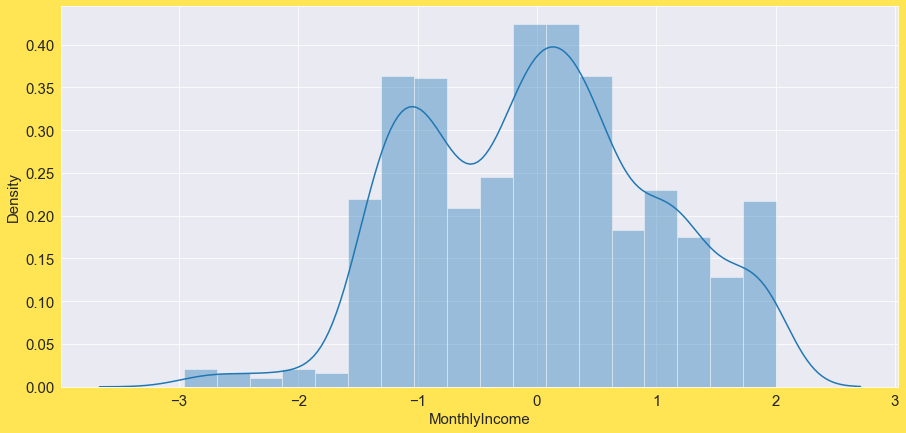

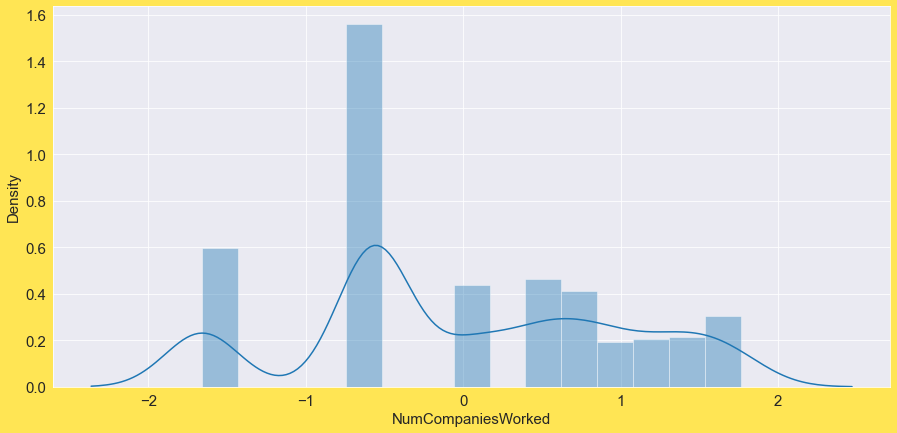

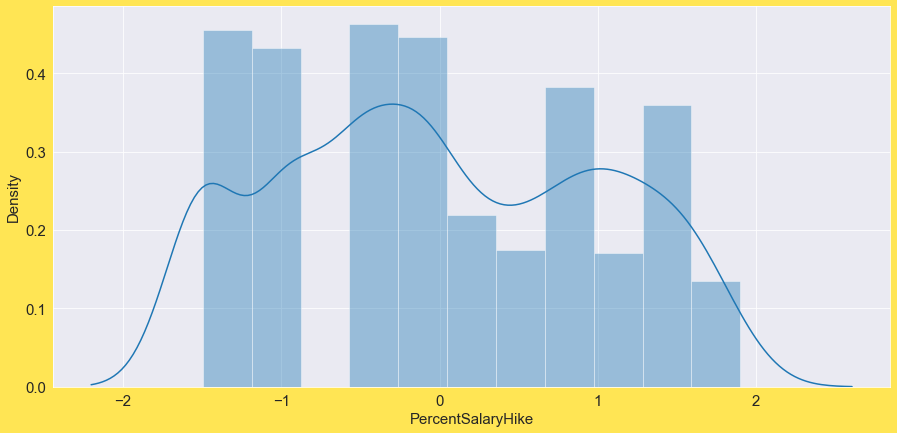

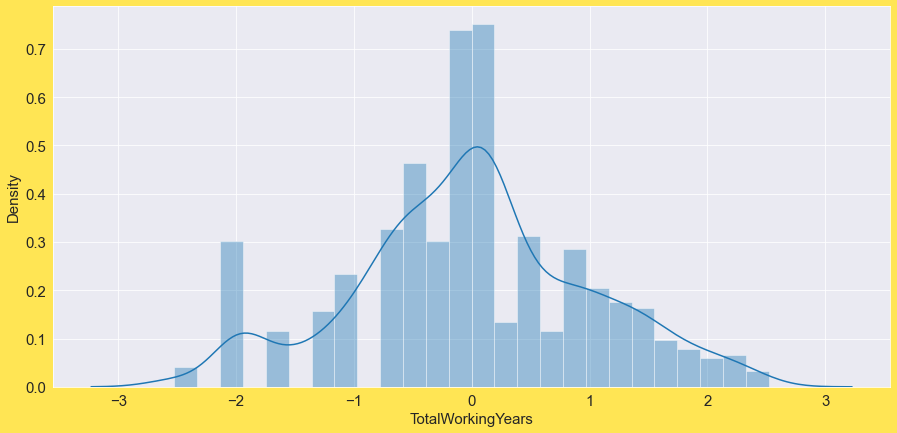

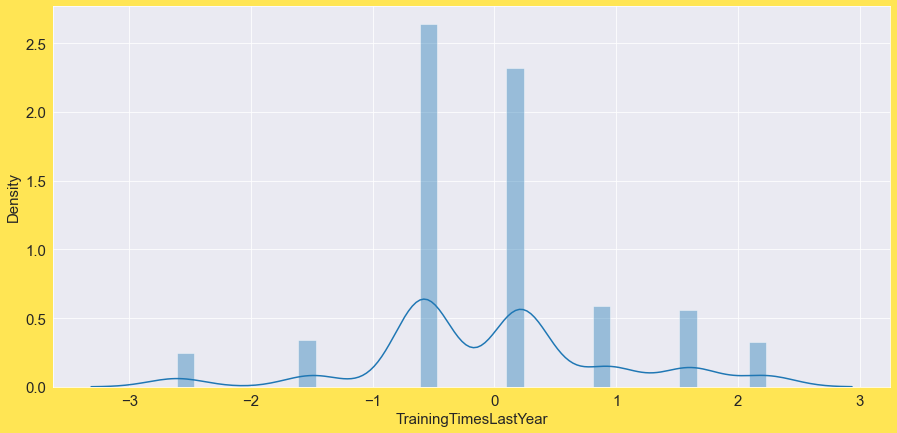

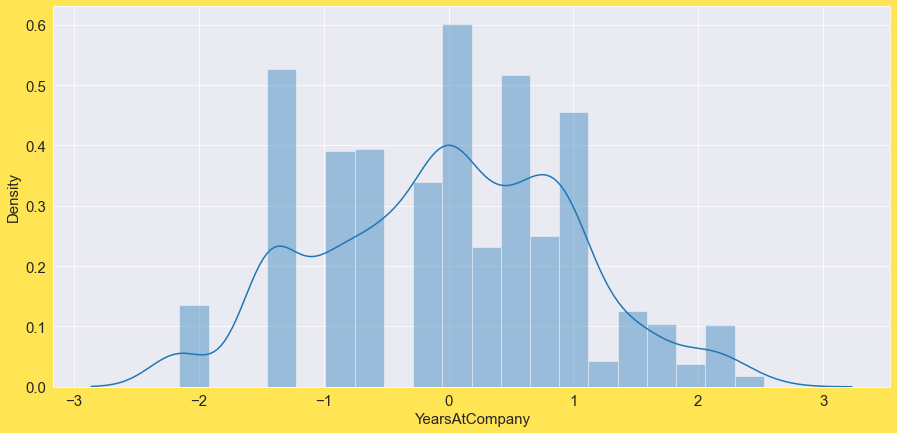

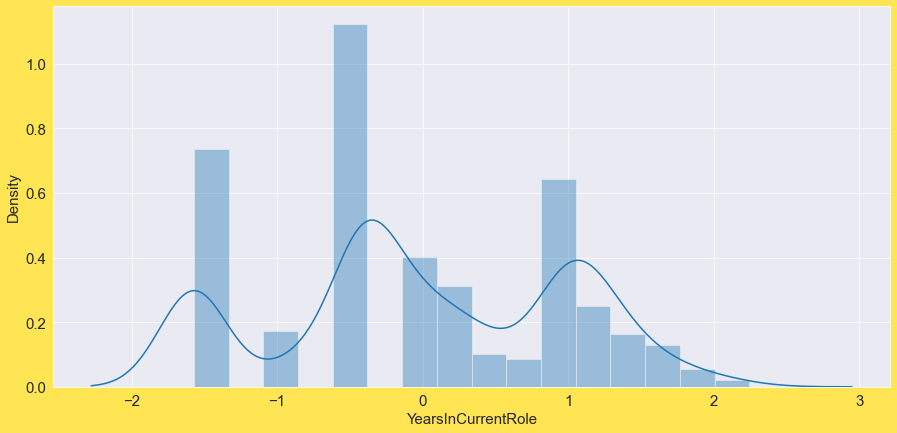

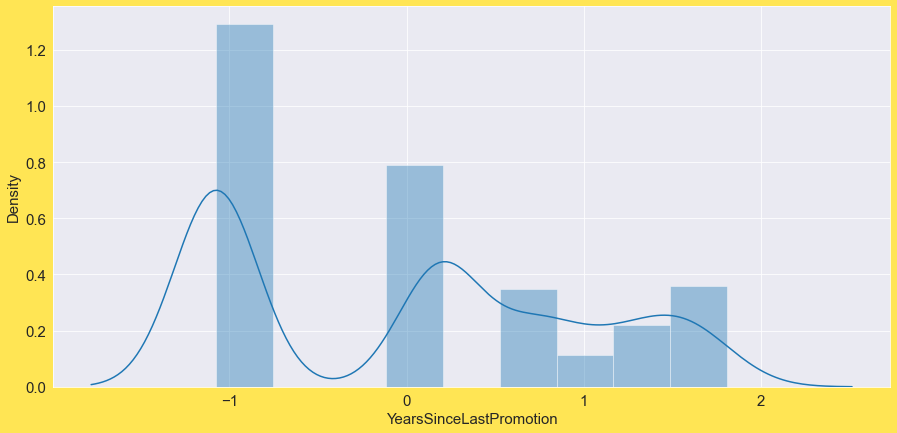

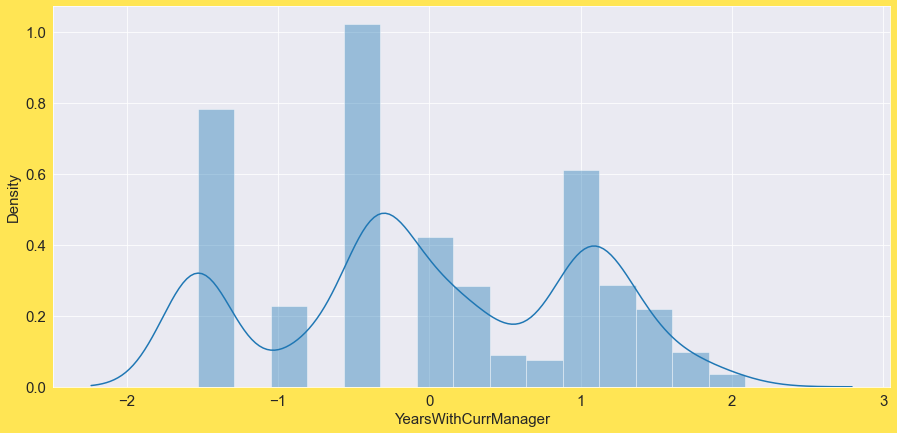

In [228]:
# Lets check the plots again
for i in skewed_cols:
    sns.distplot(HR_new[i])
    plt.show()
    
    # We can see that skewness has been removed

In [109]:
# Correlation
HR_new.corr().T

Age  Attrition  DailyRate  \
Age                                1.000000  -0.159366   0.021946   
Attrition                         -0.159366   1.000000  -0.057220   
DailyRate                          0.021946  -0.057220   1.000000   
DistanceFromHome                  -0.028793   0.080979  -0.003967   
Education                          0.198502  -0.032703  -0.018442   
EnvironmentSatisfaction            0.014098  -0.112393   0.033123   
HourlyRate                         0.025465  -0.001532   0.014279   
JobInvolvement                     0.036424  -0.133957   0.048004   
JobLevel                           0.453902  -0.171968   0.022978   
JobSatisfaction                    0.011763  -0.114206   0.042698   
MonthlyIncome                      0.436543  -0.207280   0.029530   
MonthlyRate                        0.026954   0.014888  -0.029844   
NumCompaniesWorked                 0.339436   0.047508   0.033388   
PercentSalaryHike                  0.013248  -0.017523   0.028690   
PerformanceRating                 -0.000617   0.010781   0.000574   
RelationshipSatisfaction           0.041744  -0.052344   0.004516   
StockOptionLevel                   0.054506  -0.136676   0.048361   
TotalWorkingYears                  0.634884  -0.220878   0.043307   
TrainingTimesLastYear             -0.013707  -0.059071   0.006581   
WorkLifeBalance                   -0.016913  -0.062492  -0.044266   
YearsAtCompany                     0.174149  -0.201954   0.005806   
YearsInCurrentRole                 0.118454  -0.187047   0.020542   
YearsSinceLastPromotion            0.103938  -0.050986  -0.035403   
YearsWithCurrManager               0.114962  -0.186821   0.007098   
BusinessTravel_Travel_Frequently  -0.022249   0.116800  -0.015545   
BusinessTravel_Travel_Rarely       0.025967  -0.051075   0.003318   
Department_Research & Development  0.033374  -0.090221   0.022852   
Department_Sales                  -0.039143   0.083074  -0.014907   
EducationField_Life Sciences       0.016565  -0.035955  -0.003439   
EducationField_Marketing           0.033873   0.058946  -0.073262   
EducationField_Medical            -0.011733  -0.042432   0.045228   
EducationField_Other              -0.036754  -0.017120   0.005146   
EducationField_Technical Degree   -0.015499   0.060812   0.023268   
Gender_Male                       -0.039430   0.036252  -0.005242   
JobRole_Human Resources           -0.016934   0.034906  -0.023570   
JobRole_Laboratory Technician     -0.123750   0.095714  -0.006428   
JobRole_Manager                    0.247396  -0.066023   0.011233   
JobRole_Manufacturing Director     0.061446  -0.090209  -0.014813   
JobRole_Research Director          0.165491  -0.097808   0.016283   
JobRole_Research Scientist        -0.119866  -0.004986  -0.004643   
JobRole_Sales Executive            0.007654   0.015434  -0.010386   
JobRole_Sales Representative      -0.168373   0.157980   0.003315   
MaritalStatus_Married              0.091845  -0.101353   0.041039   
MaritalStatus_Single              -0.130318   0.179495  -0.079647   
OverTime_Yes                       0.034180   0.257237   0.020294   

                                   DistanceFromHome  Education  \
Age                                       -0.028793   0.198502   
Attrition                                  0.080979  -0.032703   
DailyRate                                 -0.003967  -0.018442   
DistanceFromHome                           1.000000   0.003595   
Education                                  0.003595   1.000000   
EnvironmentSatisfaction                   -0.012075  -0.026223   
HourlyRate                                 0.014926   0.010848   
JobInvolvement                             0.036805   0.041343   
JobLevel                                  -0.004225   0.083065   
JobSatisfaction                           -0.019334  -0.007219   
MonthlyIncome                              0.000545   0.111594   
MonthlyRate                                0.048976  -0.018540   
NumComp

<AxesSubplot:>

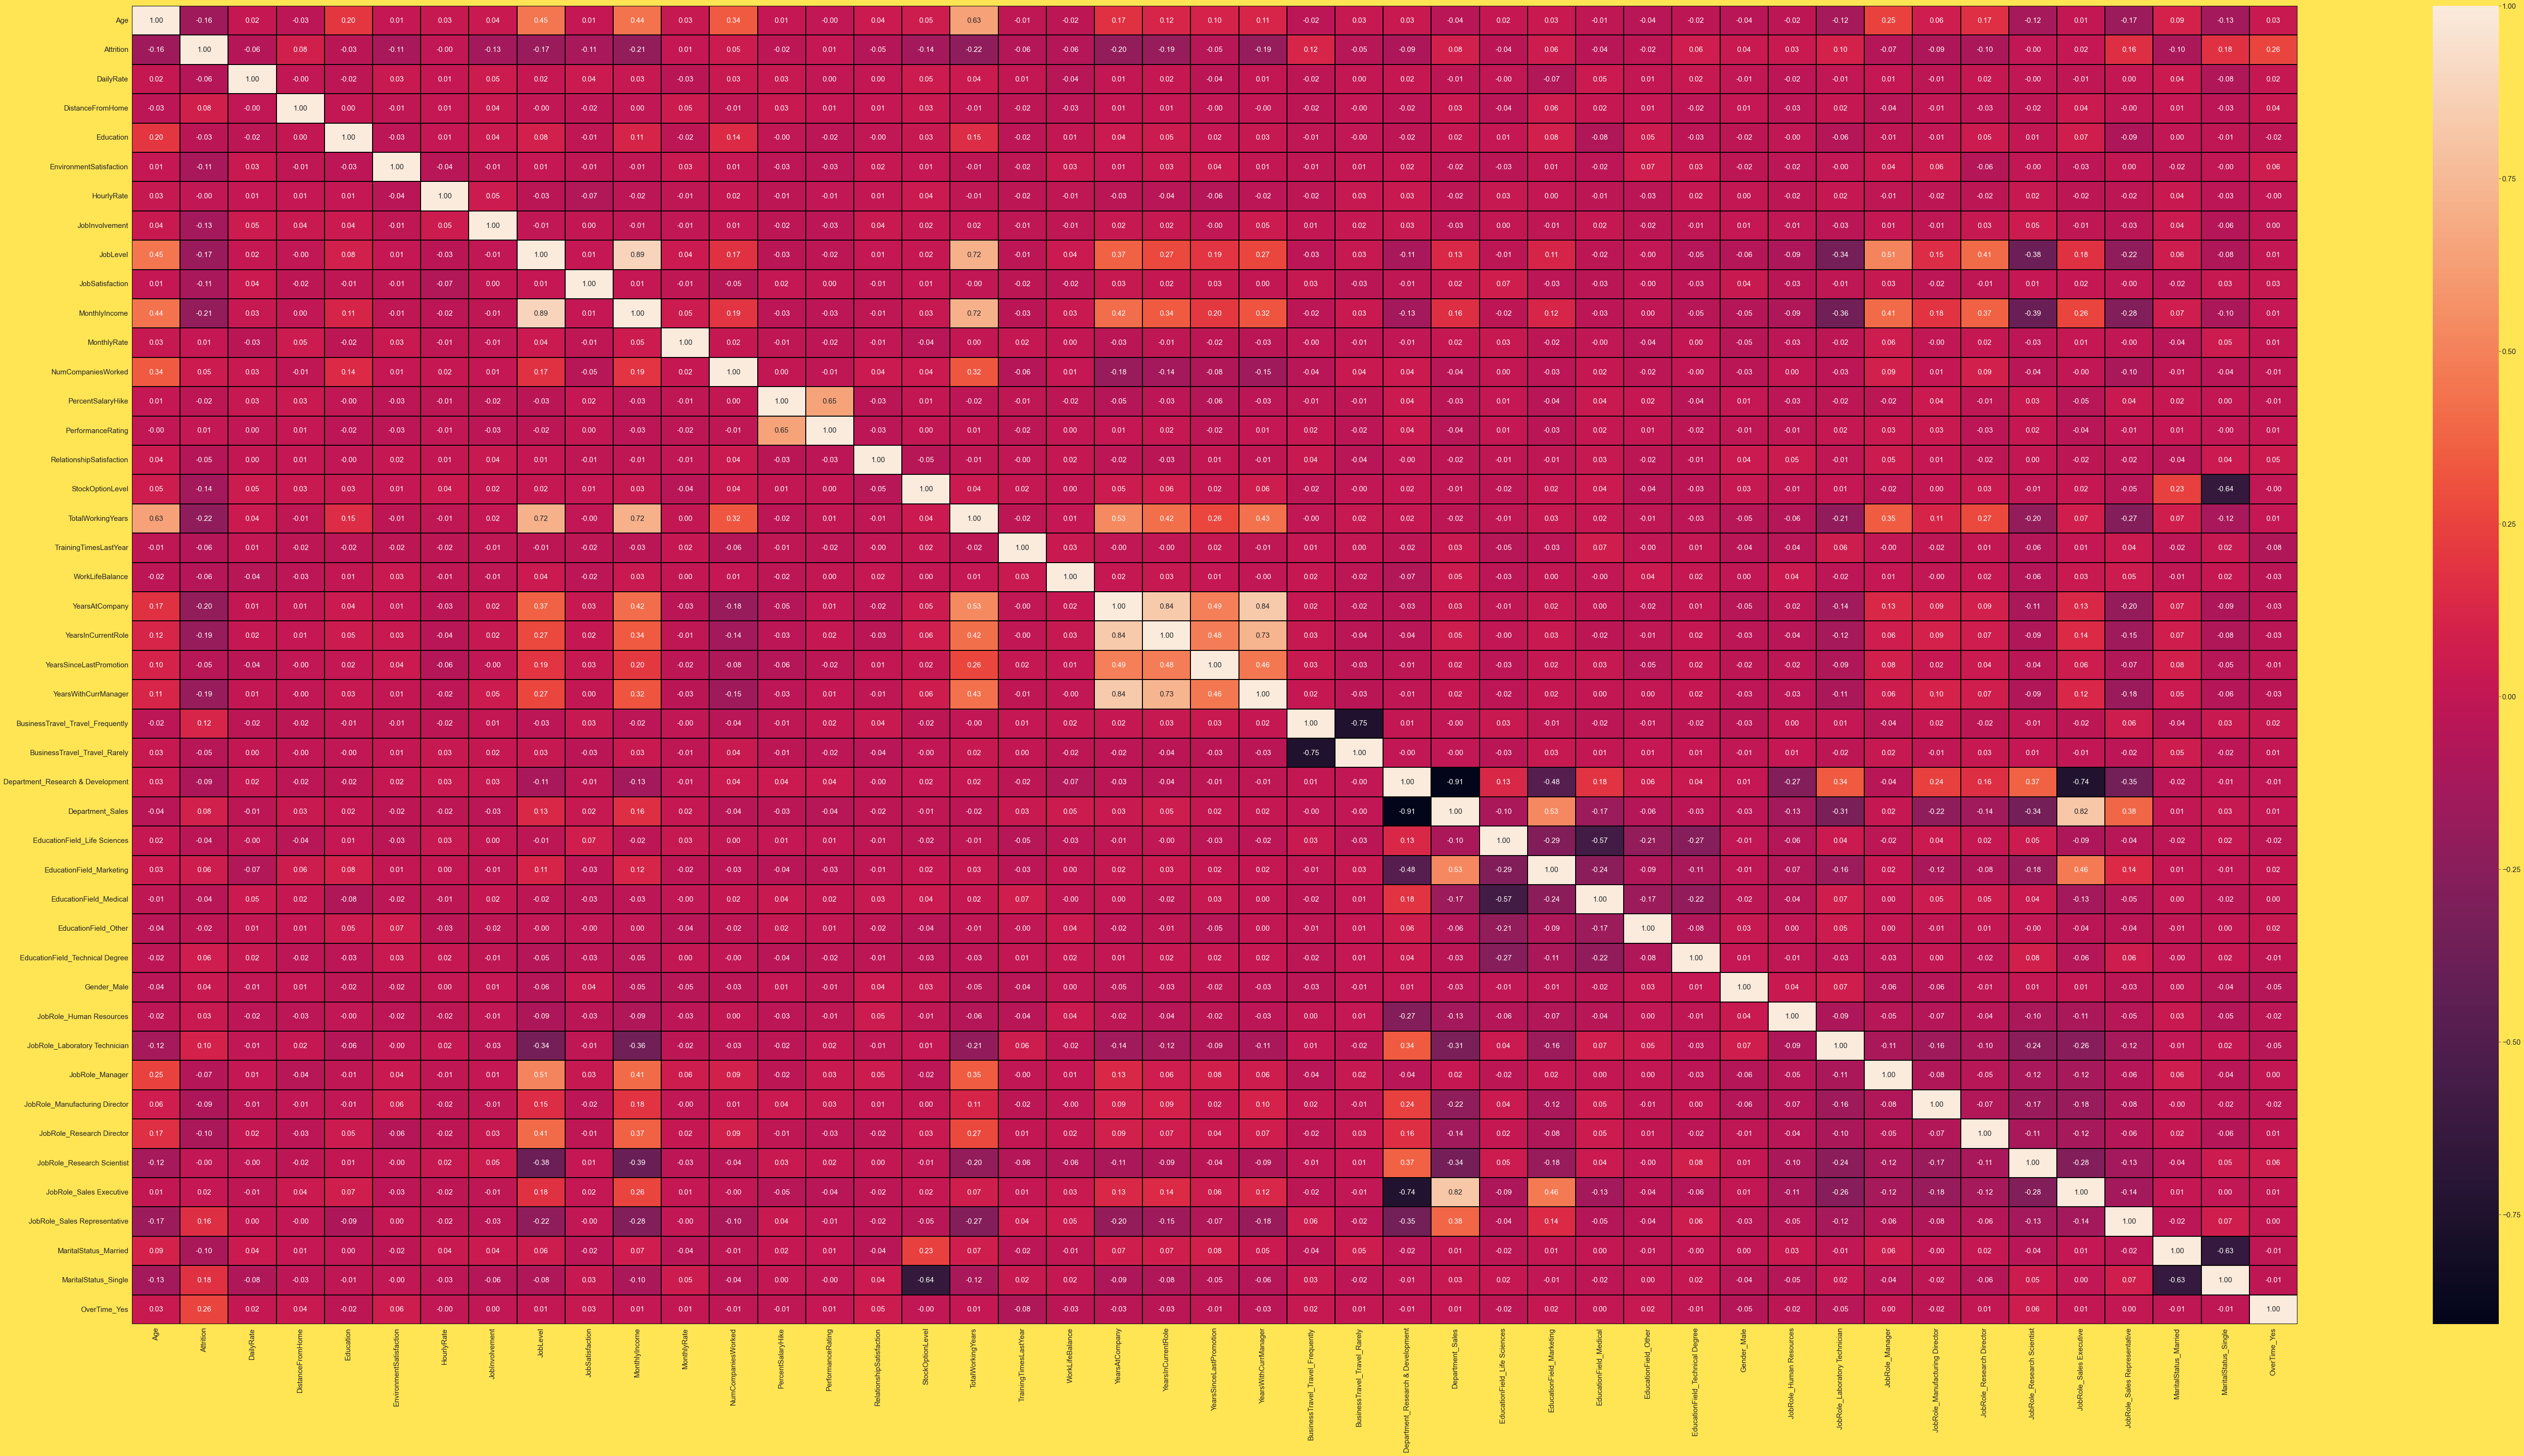

In [112]:
# plotting a heatmap
plt.figure(figsize=(100,50))
sns.heatmap(HR_new.corr(),annot=True,linewidths=1.5,linecolor='black',fmt='.2f')
plt.savefig('HR.corr') # saving the figure to view it properly

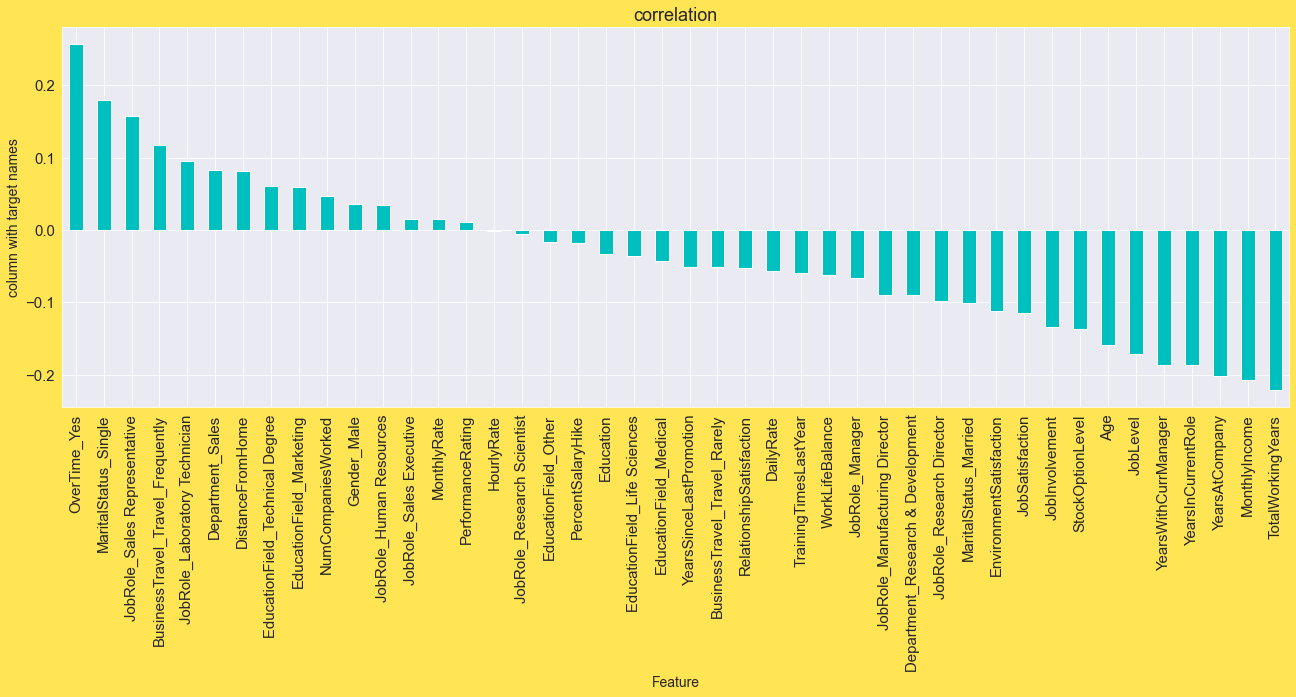

In [113]:
# Checking the correlation of features with the target colun
plt.figure(figsize=(22,7))
HR_new.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [ ]:
# Hourly rate and Research scientist are least correlated with the target so nwe will drop them

In [114]:
HR_new.drop(['HourlyRate','JobRole_Research Scientist'],axis=1,inplace=True)

In [115]:
HR_new.shape # we can see we dropped two columns

(1387, 43)

In [116]:
# seperating the x and y datax = df_new.drop("Attrition",axis=1)
x = HR_new.drop("Attrition",axis=1)
y = HR_new["Attrition"]

In [117]:
# Remember we had imbalance data so we have to balance the data using smote
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [118]:
# importing smote from imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [120]:
x, y = sm.fit_resample(x,y)

In [121]:
# rechecking the data
y.value_counts()
# Now it is balanced

1    1158
0    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

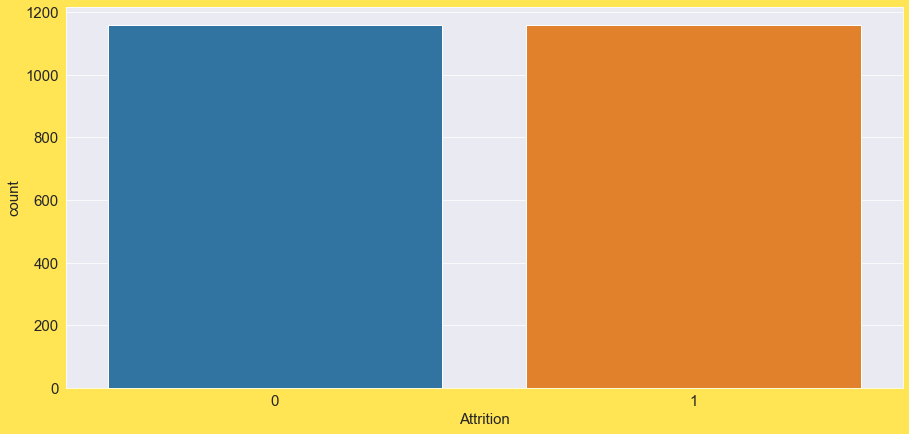

In [123]:
sns.countplot(y)
# We can see it is balanced

In [122]:
x.shape # It will increase the shape of the dataset as well

(2316, 42)

In [124]:
# We have to check for multicollinearity
# Before that we have to scale our data

In [125]:
from sklearn.preprocessing import StandardScaler

In [127]:
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [128]:
# Now checking multicollinearity with vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif



In [132]:
vif_calc()

# There seems to be no multicolinearity exist between the columns because we have got less 10 % of vif score
# So, we can go ahead now.

vif_Features                           Features
0       1.874692                                Age
1       1.051692                          DailyRate
2       1.045080                   DistanceFromHome
3       1.089457                          Education
4       1.115530            EnvironmentSatisfaction
5       1.150456                     JobInvolvement
6       5.685618                           JobLevel
7       1.136962                    JobSatisfaction
8       4.693207                      MonthlyIncome
9       1.060702                        MonthlyRate
10      1.469855                 NumCompaniesWorked
11      1.500667                  PercentSalaryHike
12      1.533313                  PerformanceRating
13      1.103499           RelationshipSatisfaction
14      1.580781                   StockOptionLevel
15      4.393398                  TotalWorkingYears
16      1.041304              TrainingTimesLastYear
17      1.107794                    WorkLifeBalance
18      6.857257                     YearsAtCompany
19      4.022178                 YearsInCurrentRole
20      1.489947            YearsSinceLastPromotion
21      3.675668               YearsWithCurrManager
22      1.520755   BusinessTravel_Travel_Frequently
23      1.596759       BusinessTravel_Travel_Rarely
24      2.727350  Department_Research & Development
25      6.299610                   Department_Sales
26      2.331552       EducationField_Life Sciences
27      1.956561           EducationField_Marketing
28      2.191858             EducationField_Medical
29      1.306079               EducationField_Other
30      1.404763    EducationField_Technical Degree
31      1.102098                        Gender_Male
32      1.164970            JobRole_Human Resources
33      1.368929      JobRole_Laboratory Technician
34      1.839179                    JobRole_Manager
35      1.364328     JobRole_Manufacturing Director
36      1.560206          JobRole_Research Director
37      5.571896            JobRole_Sales Executive
38      2.358473       JobRole_Sales Representative
39      1.492223              MaritalStatus_Married
40      1.841980               MaritalStatus_Single
41      1.046384                       OverTime_Yes

### Building Model

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [135]:
lor = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
sgdc = SGDClassifier()
xgbc = XGBClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()


### Logistic Regression

In [137]:
lor = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lor.fit(x_train,y_train)
    pred_train = lor.predict(x_train)
    pred_test = lor.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 29 The model performs very well
At random state:- 29
Training accuracy score is  91.2
Testing accuracy score is  91.2 


At random state 73 The model performs very well
At random state:- 73
Training accuracy score is  90.6
Testing accuracy score is  90.6 


At random state 81 The model performs very well
At random state:- 81
Training accuracy score is  90.9
Testing accuracy score is  90.9 


At random state 91 The model performs very well
At random state:- 91
Training accuracy score is  90.9
Testing accuracy score is  90.9 


At random state 128 The model performs very well
At random state:- 128
Training accuracy score is  90.9
Testing accuracy score is  90.9 


At random state 152 The model performs very well
At random state:- 152
Training accuracy score is  90.6
Testing accuracy score is  90.6 


At random state 186 The model performs very well
At random state:- 186
Training accuracy score is  90.4
Testing accuracy score is  90.4 


At random state 278 The model perfo

In [138]:
# We have got 90.9 accuracy at random state 91
# At random state 91 the model performs well
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=91)

In [139]:
lor.fit(x_train,y_train)
pred_train_lor = lor.predict(x_train)
pred_test_lor = lor.predict(x_test)
print(accuracy_score(y_test,pred_test_lor))
print(confusion_matrix(y_test,pred_test_lor))

# We are getting 90% accuracy

0.9093525179856116
[[296  19]
 [ 44 336]]


In [140]:
# checking the cv score
lss = accuracy_score(y_test,pred_test_lor) # creating an instance for acccuracy score
from sklearn.model_selection import cross_val_score

In [141]:
# FINDING THE BEST CV FOR LOGISTIC REG
# I have tried from 5 to 35 it is giving me less cv score so I have increased the cv from 35 to 40 
for j in range(5,15):
    lsscore = cross_val_score(lor,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')

[0.54310345 0.93952484 0.93304536 0.94384449 0.94168467]
At cv:-  5
Cross validation score is:-  86.02405600655396
accuracy_score is:-  90.93525179856115


[0.60880829 0.9119171  0.91450777 0.95595855 0.94300518 0.94559585]
At cv:-  6
Cross validation score is:-  87.99654576856649
accuracy_score is:-  90.93525179856115


[0.63141994 0.86404834 0.93957704 0.94561934 0.95468278 0.93655589
 0.95151515]
At cv:-  7
Cross validation score is:-  88.90597821111416
accuracy_score is:-  90.93525179856115


[0.64827586 0.82413793 0.94827586 0.91034483 0.96885813 0.9550173
 0.93425606 0.95155709]
At cv:-  8
Cross validation score is:-  89.25903830091875
accuracy_score is:-  90.93525179856115


[0.66666667 0.78682171 0.95348837 0.92996109 0.94163424 0.94552529
 0.95719844 0.92996109 0.95330739]
At cv:-  9
Cross validation score is:-  89.60626992026864
accuracy_score is:-  90.93525179856115


[0.67241379 0.7112069  0.93965517 0.95689655 0.90517241 0.9612069
 0.96536797 0.93506494 0.94372294 0.948051

In [142]:
# We are getting almost the same cv score as our accuracy score, so our model  is performing well
# selecting the cv=13 
lsscore_selected = cross_val_score(lor,x,y,cv=13).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

The cv score of logistcic Regression is  0.8987049922019478 
The accuracy score of logistic regression is:  0.9093525179856116


### DecisionTreeClassifier

In [143]:
# huperparameter tuning DTC
dtc_search = GridSearchCV(dtc,{'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"]})

In [144]:
dtc_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [148]:
print(dtc_search.best_score_)
print(dtc_search.best_estimator_)
print(dtc_search.best_params_)

0.8186400759734094
DecisionTreeClassifier(criterion='entropy', splitter='random')
{'criterion': 'entropy', 'splitter': 'random'}


In [147]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='entropy',splitter='random') # using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_dtc_test,y_test))
print('Classification report of Dtc',classification_report(pred_dtc_test,y_test))
print('\n')

# We are getting almost 86% accuracy

Training score of dtc 1.0
Accuracy Score of dtc 0.8661870503597122
Confusion Matrix of dtc [[265  43]
 [ 50 337]]
Classification report of Dtc               precision    recall  f1-score   support

           0       0.84      0.86      0.85       308
           1       0.89      0.87      0.88       387

    accuracy                           0.87       695
   macro avg       0.86      0.87      0.86       695
weighted avg       0.87      0.87      0.87       695





In [150]:
# Checking the cross validation of dtc
dtca = accuracy_score(pred_dtc_test,y_test)
for j in range(5,15):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score of DTC is:- ',dsc*100)
    print('accuracy_score of DTC is:- ',dtca*100)
    print('\n')

[0.62284483 0.8574514  0.88336933 0.85313175 0.87041037]
At cv:-  5
Cross validation score of DTC is:-  81.74415357116258
accuracy_score of DTC is:-  86.61870503597122


[0.61139896 0.84974093 0.84455959 0.86010363 0.91709845 0.89378238]
At cv:-  6
Cross validation score of DTC is:-  82.94473229706388
accuracy_score of DTC is:-  86.61870503597122


[0.6102719  0.81873112 0.85498489 0.87009063 0.86706949 0.88217523
 0.86666667]
At cv:-  7
Cross validation score of DTC is:-  82.42842756437922
accuracy_score of DTC is:-  86.61870503597122


[0.63448276 0.76896552 0.87931034 0.88275862 0.85813149 0.89273356
 0.89965398 0.88235294]
At cv:-  8
Cross validation score of DTC is:-  83.72986517122062
accuracy_score of DTC is:-  86.61870503597122


[0.61627907 0.73255814 0.86046512 0.90661479 0.85603113 0.88326848
 0.89105058 0.89883268 0.87159533]
At cv:-  9
Cross validation score of DTC is:-  83.51883690767049
accuracy_score of DTC is:-  86.61870503597122


[0.62068966 0.62068966 0.92672414 0.8

In [151]:
# the cv score at 12 and accuracy score is almost same, so we can say that the model is working well
# cv= 12 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=12).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

The cv score of DecisionTree is  0.836355785837651 
The accuracy score of DecisionTree is:  0.8661870503597122


### SupportVectorClassifier

In [153]:
paramgrid_svc = {'C':[0.1,0.2,0.3,0.4,1.0,1.5],
                 'kernel':['rbf','poly','sigmoid'],
                 'degree':[3,4,5,6],'gamma':['scale','auto'],'decision_function_shape':['ovo', 'ovr'],'cache_size':[150,200,250,300],'shrinking':[True,False]}
print(paramgrid_svc)

{'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr'], 'cache_size': [150, 200, 250, 300], 'shrinking': [True, False]}


In [154]:
svcs = GridSearchCV(svc,param_grid=paramgrid_svc,error_score='raise')

In [155]:
svcs.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5],
                         'cache_size': [150, 200, 250, 300],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [156]:
print(svcs.best_score_)
print(svcs.best_estimator_)
print(svcs.best_params_)

0.9117796771130106
SVC(C=1.5, cache_size=150, decision_function_shape='ovo')
{'C': 1.5, 'cache_size': 150, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


In [158]:
# running the model using the best params
svc = SVC(C=1.5,degree=3,gamma='scale',kernel='rbf',cache_size=150,decision_function_shape='ovo',shrinking=True) # using the best parameters
svc.fit(x_train,y_train)
pred_svc_test= svc.predict(x_test)
pred_svc_train = svc.predict(x_train)
print('Training score of svc',accuracy_score(pred_svc_train,y_train))
print('Accuracy Score of svc',accuracy_score(pred_svc_test,y_test))
print('Confusion Matrix of svc',confusion_matrix(pred_svc_test,y_test))
print('Classification report of svc',classification_report(pred_svc_test,y_test))
print('\n')

# We are getting around 91 % accuracy with SVC

Training score of svc 0.9759407772979642
Accuracy Score of svc 0.9064748201438849
Confusion Matrix of svc [[299  49]
 [ 16 331]]
Classification report of svc               precision    recall  f1-score   support

           0       0.95      0.86      0.90       348
           1       0.87      0.95      0.91       347

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695





In [159]:
# checking the cv score
svca = accuracy_score(y_test,pred_svc_test) 
for j in range(5,15):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.53448276 0.96328294 0.97192225 0.95680346 0.96112311]
At cv:-  5
Cross validation score is:-  87.75229016161464
accuracy_score is:-  90.64748201438849


[0.57512953 0.92227979 0.96632124 0.97668394 0.96891192 0.95854922]
At cv:-  6
Cross validation score is:-  89.46459412780655
accuracy_score is:-  90.64748201438849


[0.6102719  0.8489426  0.96374622 0.97280967 0.96676737 0.95468278
 0.96363636]
At cv:-  7
Cross validation score is:-  89.72652724918586
accuracy_score is:-  90.64748201438849


[0.63448276 0.80689655 0.97241379 0.96206897 0.98615917 0.96885813
 0.9550173  0.96539792]
At cv:-  8
Cross validation score is:-  90.64118243646342
accuracy_score is:-  90.64748201438849


[0.62403101 0.73643411 0.96899225 0.9688716  0.9766537  0.9688716
 0.9688716  0.95330739 0.9688716 ]
At cv:-  9
Cross validation score is:-  90.38783150175784
accuracy_score is:-  90.64748201438849


[0.61206897 0.67241379 0.96551724 0.98275862 0.95689655 0.98706897
 0.96536797 0.95670996 0.95238095 0.97402

In [160]:
# selecting cv = 8
svcscore_selected = cross_val_score(svc,x,y,cv=8).mean()
print('The cv score of SVC is ',svcscore_selected,'\nThe accuracy score of SVC is: ',svca)

# We are getting 90% accuracy from support vector classifier and the difference between cv score and accuracy is almost same
# So our model is performing well

The cv score of SVC is  0.9064118243646343 
The accuracy score of SVC is:  0.9064748201438849


## KNeighborsClassifier

In [161]:
paramgrid_knc = {'n_neighbors':[x for x in range(5,16)],'algorithm':['auto','ball_tree','kd_tree'],
                 'leaf_size':[l for l in range(30,41)],'p':[2,3,4,6],}

In [162]:
knc_search = GridSearchCV(knc,param_grid=paramgrid_knc,cv=3)

In [163]:
knc_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'p': [2, 3, 4, 6]})

In [164]:
print(knc_search.best_score_)
print(knc_search.best_estimator_)
print(knc_search.best_params_)

0.8821729307866092
KNeighborsClassifier(n_neighbors=8)
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 8, 'p': 2}


In [165]:
# running the model using the best params
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=8,p=2) # using the best parameters
knc.fit(x_train,y_train)
pred_knc_test= knc.predict(x_test)
pred_knc_train = knc.predict(x_train)
print('Training score of knc: ',accuracy_score(pred_knc_train,y_train))
print('Accuracy Score of knc: ',accuracy_score(pred_knc_test,y_test))
print('Confusion Matrix of knc: ',confusion_matrix(pred_knc_test,y_test))
print('Classification report of knc: ',classification_report(pred_knc_test,y_test))
print('\n')

# getting 89% accuracy

Training score of knc:  0.9253547193090684
Accuracy Score of knc:  0.8992805755395683
Confusion Matrix of knc:  [[282  37]
 [ 33 343]]
Classification report of knc:                precision    recall  f1-score   support

           0       0.90      0.88      0.89       319
           1       0.90      0.91      0.91       376

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695





In [166]:
# checking the cv score
knca = accuracy_score(y_test,pred_knc_test) 
for j in range(5,15):
    knccore = cross_val_score(knc,x,y,cv=j)
    print(knccore)
    kncc = knccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',kncc*100)
    print('accuracy_score is:- ',knca*100)
    print('\n') # cv and accuracy is almost same

[0.70043103 0.93304536 0.93088553 0.93952484 0.9524838 ]
At cv:-  5
Cross validation score is:-  89.12741118641543
accuracy_score is:-  89.92805755395683


[0.7253886  0.9015544  0.90932642 0.9507772  0.94818653 0.9507772 ]
At cv:-  6
Cross validation score is:-  89.76683937823834
accuracy_score is:-  89.92805755395683


[0.72205438 0.8489426  0.9244713  0.94561934 0.94561934 0.94561934
 0.95757576]
At cv:-  7
Cross validation score is:-  89.85574345090961
accuracy_score is:-  89.92805755395683


[0.72068966 0.80689655 0.93448276 0.9137931  0.95155709 0.92387543
 0.94463668 0.95155709]
At cv:-  8
Cross validation score is:-  89.34360458179216
accuracy_score is:-  89.92805755395683


[0.72868217 0.75581395 0.9379845  0.91050584 0.93385214 0.94163424
 0.94163424 0.94941634 0.96498054]
At cv:-  9
Cross validation score is:-  89.6055996273171
accuracy_score is:-  89.92805755395683


[0.71982759 0.73706897 0.93965517 0.92672414 0.91810345 0.94396552
 0.94372294 0.94372294 0.95238095 0.96103

In [167]:
# selecting cv = 10 and we are getting accuracy and cv score almost same , which means our model is working well
kncscore_selected = cross_val_score(knc,x,y,cv=10).mean()
print('The cv score of KNeighborsC is ',kncscore_selected,'\nThe accuracy score of KNeighborsC is: ',knca)

# 89% accuracy from KNeighborsC

The cv score of KNeighborsC is  0.8986210628452007 
The accuracy score of KNeighborsC is:  0.8992805755395683


## SGDClassifier

In [168]:
# paramgrid
parametergrid_sgdc = {'loss':['hinge','log_loss','log','modified_huber','squared_hinge'],
                     'penalty':['l2','l1','elasticnet'],'alpha':[0.1,.001,0.0001],'max_iter':[1000,1200,1300]}

In [169]:
sgdc_search = GridSearchCV(sgdc,param_grid=parametergrid_sgdc)

In [170]:
sgdc_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [1000, 1200, 1300],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [171]:
print(sgdc_search.best_score_)
print(sgdc_search.best_estimator_)
print(sgdc_search.best_params_)

0.9037720797720799
SGDClassifier(alpha=0.001, loss='log', penalty='l1')
{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}


In [172]:
# running the model using the best params
sgdc = SGDClassifier(alpha=0.0001,loss='log',max_iter=1000,penalty='l1') # using the best parameters
sgdc.fit(x_train,y_train)
pred_sgdc_test= sgdc.predict(x_test)
pred_sgdc_train = sgdc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_sgdc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_sgdc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_sgdc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_sgdc_test,y_test))
print('\n')

Training score of SGDClassifier:  0.8988278840222085
Accuracy Score of SGDClassifier:  0.8935251798561151
Confusion Matrix of SGDClassifier:  [[289  48]
 [ 26 332]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.92      0.86      0.89       337
           1       0.87      0.93      0.90       358

    accuracy                           0.89       695
   macro avg       0.90      0.89      0.89       695
weighted avg       0.89      0.89      0.89       695





In [173]:
# checking the cv score
sgdca = accuracy_score(y_test,pred_sgdc_test) 
for j in range(4,15):
    sgdccore = cross_val_score(sgdc,x,y,cv=j)
    print(sgdccore)
    sgdcc = sgdccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgdca*100)
    print('\n') # cv and accuracy is almost same

[0.6373057  0.91364421 0.9447323  0.92400691]
At cv:-  4
Cross validation score is:-  85.49222797927462
accuracy_score is:-  89.35251798561151


[0.54525862 0.90280778 0.90280778 0.90928726 0.9287257 ]
At cv:-  5
Cross validation score is:-  83.77774260817755
accuracy_score is:-  89.35251798561151


[0.63989637 0.87564767 0.90932642 0.92746114 0.94041451 0.92227979]
At cv:-  6
Cross validation score is:-  86.91709844559585
accuracy_score is:-  89.35251798561151


[0.64048338 0.86706949 0.90936556 0.91238671 0.91238671 0.90936556
 0.89090909]
At cv:-  7
Cross validation score is:-  86.31380703888256
accuracy_score is:-  89.35251798561151


[0.6862069  0.79655172 0.95517241 0.91034483 0.94809689 0.94463668
 0.92387543 0.92387543]
At cv:-  8
Cross validation score is:-  88.60950363918387
accuracy_score is:-  89.35251798561151


[0.63953488 0.75968992 0.95348837 0.90661479 0.92217899 0.93385214
 0.87548638 0.92607004 0.91050584]
At cv:-  9
Cross validation score is:-  86.97134832778667
acc

In [174]:
# selecting cv = 8
sgdcscore_selected = cross_val_score(sgdc,x,y,cv=8).mean()
print('The cv score of SGDClassifier is ',sgdcscore_selected,'\nThe accuracy score of SGDClassifier is: ',sgdca)

# 87% with sgdc and cv score is almost same so our model is working well

The cv score of SGDClassifier is  0.8705673547309389 
The accuracy score of SGDClassifier is:  0.8935251798561151


### ENSEMBLE METHODS

#### RandomForestClassifier

In [175]:
# framing the parameters
# no of trees in random forest
n_estimators = [int(x) for x in range(100,300,50)]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4,6]

min_samples_split = [2,5,7,3,4]

min_samples_leaf = [2,3,4,5]

In [176]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
print(param_grid)

{'n_estimators': [100, 150, 200, 250], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 7, 3, 4], 'min_samples_leaf': [2, 3, 4, 5]}


In [177]:
rfc_search = GridSearchCV(rfc,param_grid=param_grid)

In [178]:
rfc_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 7, 3, 4],
                         'n_estimators': [100, 150, 200, 250]})

In [179]:
print(rfc_search.best_score_)
print(rfc_search.best_estimator_)
print(rfc_search.best_params_) # we got the best score and best params

0.8870940170940171
RandomForestClassifier(criterion='log_loss', max_depth=6, max_features=None,
                       min_samples_leaf=4, min_samples_split=5)
{'criterion': 'log_loss', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [180]:
# running the model using the best params
rfc = RandomForestClassifier(criterion='log_loss', max_depth=6, max_features=None,min_samples_leaf=4, min_samples_split=5,n_estimators=100) # using the best parameters
rfc.fit(x_train,y_train)
pred_rfc_test= rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)
print('Training score of RandomForestClassifier: ',accuracy_score(pred_rfc_train,y_train))
print('Accuracy Score of RandomForestClassifier: ',accuracy_score(pred_rfc_test,y_test))
print('Confusion Matrix of RandomForestClassifier: ',confusion_matrix(pred_rfc_test,y_test))
print('Classification report of RandomForestClassifier: ',classification_report(pred_rfc_test,y_test))
print('\n')

# getting 88% accuracy

Training score of RandomForestClassifier:  0.9487970388648982
Accuracy Score of RandomForestClassifier:  0.879136690647482
Confusion Matrix of RandomForestClassifier:  [[281  50]
 [ 34 330]]
Classification report of RandomForestClassifier:                precision    recall  f1-score   support

           0       0.89      0.85      0.87       331
           1       0.87      0.91      0.89       364

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695





In [182]:
# checking the cv score
rfca = accuracy_score(y_test,pred_rfc_test) 
for j in range(4,15):
    rfccore = cross_val_score(rfc,x,y,cv=j)
    print(rfccore)
    rfcc = rfccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfcc*100)
    print('accuracy_score is:- ',rfca*100)
    print('\n') # cv and accuracy is almost same

[0.67184801 0.91537133 0.92746114 0.93091537]
At cv:-  4
Cross validation score is:-  86.13989637305698
accuracy_score is:-  87.9136690647482


[0.61853448 0.92656587 0.92008639 0.92440605 0.93736501]
At cv:-  5
Cross validation score is:-  86.5391561778506
accuracy_score is:-  87.9136690647482


[0.62953368 0.89896373 0.91968912 0.93523316 0.92746114 0.92746114]
At cv:-  6
Cross validation score is:-  87.30569948186529
accuracy_score is:-  87.9136690647482


[0.61933535 0.83685801 0.90936556 0.93957704 0.9305136  0.93957704
 0.94242424]
At cv:-  7
Cross validation score is:-  87.39501183609946
accuracy_score is:-  87.9136690647482


[0.63793103 0.80344828 0.93103448 0.9137931  0.9550173  0.91695502
 0.94463668 0.93079585]
At cv:-  8
Cross validation score is:-  87.92014676052978
accuracy_score is:-  87.9136690647482


[0.64728682 0.73643411 0.95736434 0.90661479 0.93385214 0.93385214
 0.92607004 0.94163424 0.92996109]
At cv:-  9
Cross validation score is:-  87.92299674572772
accuracy_

In [183]:
# selecting cv = 12
# we are getting the cv score and accuracy almost same so our model is working well
rfcscore_selected = cross_val_score(rfc,x,y,cv=12).mean()
print('The cv score of RandomForestClassifier is ',rfcscore_selected,'\nThe accuracy score of RandomForestClassifier is: ',rfca)

The cv score of RandomForestClassifier is  0.8812607944732296 
The accuracy score of RandomForestClassifier is:  0.879136690647482


### AdaBoostClassifier

In [187]:
parametergrid_abc = {'n_estimators':[x for x in range(50,61)],'algorithm':['SAMME','SAMME.R'],'learning_rate':[0.5,1.0,1.5,2.0]}

In [188]:
abc_search = GridSearchCV(abc,param_grid=parametergrid_abc)

In [189]:
abc_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

In [190]:
print(abc_search.best_score_)
print(abc_search.best_estimator_)
print(abc_search.best_params_) # we got the best score and best params

0.8932858499525166
AdaBoostClassifier(learning_rate=0.5, n_estimators=60)
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 60}


In [191]:
# running the model using the best params
abc = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=60) # using the best parameters
abc.fit(x_train,y_train)
pred_abc_test= abc.predict(x_test)
pred_abc_train = abc.predict(x_train)
print('Training score of AdaBoostClassifier: ',accuracy_score(pred_abc_train,y_train))
print('Accuracy Score of AdaBoostClassifier: ',accuracy_score(pred_abc_test,y_test))
print('Confusion Matrix of AdaBoostClassifier: ',confusion_matrix(pred_abc_test,y_test))
print('Classification report of AdaBoostClassifier: ',classification_report(pred_abc_test,y_test))
print('\n')

# we are getting 90% accuracy with AdaBoostC

Training score of AdaBoostClassifier:  0.9093152375077113
Accuracy Score of AdaBoostClassifier:  0.8964028776978418
Confusion Matrix of AdaBoostClassifier:  [[282  39]
 [ 33 341]]
Classification report of AdaBoostClassifier:                precision    recall  f1-score   support

           0       0.90      0.88      0.89       321
           1       0.90      0.91      0.90       374

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695





In [193]:
# checking the cv score
abca = accuracy_score(y_test,pred_abc_test) 
for j in range(4,15):
    abccore = cross_val_score(abc,x,y,cv=j)
    print(abccore)
    abcc = abccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',abcc*100)
    print('accuracy_score is:- ',abca*100)
    print('\n') # cv and accuracy is almost same

[0.64421416 0.92400691 0.93609672 0.91537133]
At cv:-  4
Cross validation score is:-  85.4922279792746
accuracy_score is:-  89.64028776978418


[0.56681034 0.93088553 0.91576674 0.93520518 0.93520518]
At cv:-  5
Cross validation score is:-  85.67745959633575
accuracy_score is:-  89.64028776978418


[0.62176166 0.90414508 0.91450777 0.93782383 0.92487047 0.93264249]
At cv:-  6
Cross validation score is:-  87.26252158894646
accuracy_score is:-  89.64028776978418


[0.64652568 0.87613293 0.9244713  0.9244713  0.93655589 0.94259819
 0.93636364]
At cv:-  7
Cross validation score is:-  88.38741319103856
accuracy_score is:-  89.64028776978418


[0.65862069 0.82068966 0.93448276 0.89310345 0.95155709 0.94117647
 0.91349481 0.93771626]
At cv:-  8
Cross validation score is:-  88.13551485502923
accuracy_score is:-  89.64028776978418


[0.65503876 0.7751938  0.94186047 0.91828794 0.91828794 0.92217899
 0.93385214 0.93385214 0.93774319]
At cv:-  9
Cross validation score is:-  88.1810595320685
accur

In [194]:
# selecting cv = 14
# we are getting cv score and accuracy almost same, so our model is working well
abcscore_selected = cross_val_score(abc,x,y,cv=14).mean()
print('The cv score of AdaBoostClassifier is ',abcscore_selected,'\nThe accuracy score of AdaBoostClassifier is: ',abca)

The cv score of AdaBoostClassifier is  0.8896051739425233 
The accuracy score of AdaBoostClassifier is:  0.8964028776978418


### GradientBoostingClassifier

In [205]:
parametergrid_gbc = {'loss':['log_loss','deviance','exponential'],'n_estimators':[int(x) for x in range(100,300,50)],
                    'criterion':['friedman_mse','squared_error','mse']} 

In [206]:
gbc_search = GridSearchCV(gbc,param_grid=parametergrid_gbc)

In [207]:
gbc_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [100, 150, 200, 250]})

In [208]:
print(gbc_search.best_score_)
print(gbc_search.best_estimator_)
print(gbc_search.best_params_) # we got the best score and best params

0.9074624881291549
GradientBoostingClassifier(criterion='squared_error', n_estimators=250)
{'criterion': 'squared_error', 'loss': 'log_loss', 'n_estimators': 250}


In [209]:
# running the model using the best params
gbc = GradientBoostingClassifier(loss='log_loss',n_estimators=250,criterion='squared_error',subsample=0.5,learning_rate=0.3) # using the best parameters
gbc.fit(x_train,y_train)
pred_gbc_test= gbc.predict(x_test)
pred_gbc_train = gbc.predict(x_train)
print('Training score of GradientBoostingClassifier: ',accuracy_score(pred_gbc_train,y_train))
print('Accuracy Score of GradientBoostingClassifier: ',accuracy_score(pred_gbc_test,y_test))
print('Confusion Matrix of GradientBoostingClassifier: ',confusion_matrix(pred_gbc_test,y_test))
print('Classification report of GradientBoostingClassifier: ',classification_report(pred_gbc_test,y_test))
print('\n')

# getting 91% accuracy

Training score of GradientBoostingClassifier:  1.0
Accuracy Score of GradientBoostingClassifier:  0.9136690647482014
Confusion Matrix of GradientBoostingClassifier:  [[290  35]
 [ 25 345]]
Classification report of GradientBoostingClassifier:                precision    recall  f1-score   support

           0       0.92      0.89      0.91       325
           1       0.91      0.93      0.92       370

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695





In [211]:
# checking the cv score
gbca = accuracy_score(y_test,pred_gbc_test) 
for j in range(10,15):
    gbccore = cross_val_score(gbc,x,y,cv=j)
    print(gbccore)
    gbcc = gbccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',gbcc*100)
    print('accuracy_score is:- ',gbca*100)
    print('\n') # cv and accuracy is almost same

[0.68534483 0.70258621 0.96551724 0.94396552 0.95689655 0.95689655
 0.94372294 0.94372294 0.95670996 0.96103896]
At cv:-  10
Cross validation score is:-  90.1640170174653
accuracy_score is:-  91.36690647482014


[0.65876777 0.67298578 0.94312796 0.97156398 0.93364929 0.92890995
 0.94285714 0.96666667 0.93809524 0.96190476 0.96666667]
At cv:-  11
Cross validation score is:-  89.86541105024519
accuracy_score is:-  91.36690647482014


[0.65803109 0.67875648 0.87564767 0.97927461 0.94300518 0.93264249
 0.94300518 0.92746114 0.98963731 0.94818653 0.96891192 0.94300518]
At cv:-  12
Cross validation score is:-  89.89637305699482
accuracy_score is:-  91.36690647482014


[0.68156425 0.67039106 0.81460674 1.         0.95505618 0.92696629
 0.93820225 0.97191011 0.93258427 0.96629213 0.97191011 0.96067416
 0.94382022]
At cv:-  13
Cross validation score is:-  90.26136753209755
accuracy_score is:-  91.36690647482014


[0.6746988  0.69277108 0.77108434 0.95783133 0.96987952 0.95180723
 0.96363636 0.9

In [212]:
# selecting cv =10
gbcscore_selected = cross_val_score(gbc,x,y,cv=10).mean()
print('The cv score of GradientBoostingClassifier is ',abcscore_selected,'\nThe accuracy score of GradientBoostingClassifier is: ',rfca)

The cv score of GradientBoostingClassifier is  0.8896051739425233 
The accuracy score of GradientBoostingClassifier is:  0.879136690647482


### Model Selection

In [213]:
models = pd.DataFrame({'Model Name':['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','KNeighborsClassifier','SGDClassifier','SupportVectorClassifier'],
                       'Accuracy':[lss,dtca,rfca,abca,gbca,knca,sgdca,svca],
                       'CV_Score':[lsscore_selected,dtcscore_selected,rfcscore_selected,abcscore_selected,gbcscore_selected,kncscore_selected,sgdcscore_selected,svcscore_selected]})

In [214]:
models

# selecting GradientBoosting Classifier as my best model

Model Name  Accuracy  CV_Score
0         Logistic Regression  0.909353  0.898705
1      DecisionTreeClassifier  0.866187  0.836356
2      RandomForestClassifier  0.879137  0.881261
3          AdaBoostClassifier  0.896403  0.889605
4  GradientBoostingClassifier  0.913669  0.901651
5        KNeighborsClassifier  0.899281  0.898621
6               SGDClassifier  0.893525  0.870567
7     SupportVectorClassifier  0.906475  0.906412

#### plotting a roc curve

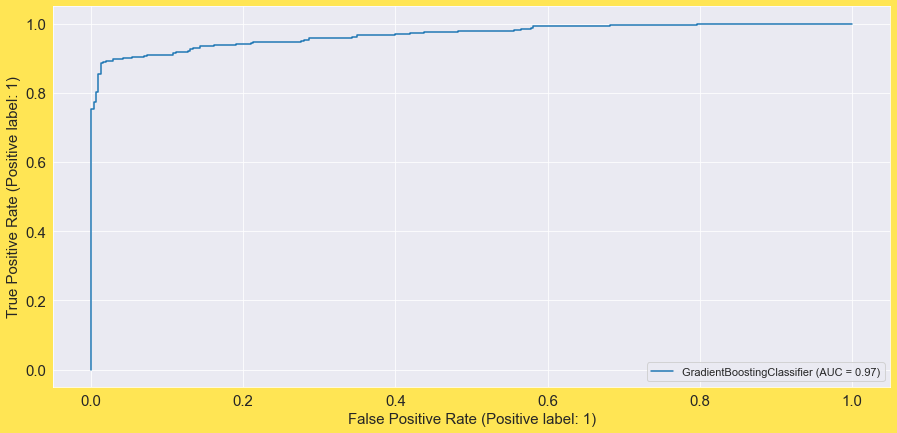

In [224]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(gbc,x_test,y_test)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# We can see GBClassifer with 91% accuracy

### Model Saving

In [225]:
import pickle
filename = 'HR_attrition.pkl'
pickle.dump(gbc,open(filename, 'wb'))

In [226]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gbc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com

# comparison of predicted and original value

Original  Predicted
0           0          0
1           1          1
2           0          0
3           0          0
4           1          1
5           1          1
6           1          1
7           1          0
8           1          1
9           0          0
10          1          1
11          1          1
12          0          1
13          1          1
14          1          1
15          0          0
16          0          0
17          1          1
18          1          1
19          0          0
20          0          0
21          1          1
22          0          0
23          1          0
24          1          1
25          1          1
26          1          1
27          0          0
28          0          0
29          0          0
30          1          1
31          1          1
32          1          1
33          0          0
34          1          1
35          0          0
36          1          1
37          0          0
38          1          1
39          1          1
40          1          1
41          1          1
42          1          1
43          1          1
44          0          0
45          0          0
46          0          0
47          1          1
48          1          1
49          0          0
50          0          0
51          0          0
52          1          1
53          0          0
54          1          1
55          0          0
56          1          1
57          1          1
58          1          1
59          1          1
60          0          0
61          0          0
62          1          1
63          1          1
64          1          1
65          0          0
66          1          1
67          1          1
68          1          1
69          0          0
70          1          1
71          1          1
72          0          0
73          0          0
74          0          0
75          1          0
76          0          0
77          1          1
78          1          0
79          0          0
80          0          0
81          1          1
82          1          1
83          0          0
84          1          1
85          0          0
86          0          0
87          0          0
88          0          0
89          0          1
90          0          0
91          1          1
92          1          1
93          1          1
94          0          0
95          0          0
96          1          1
97          1          1
98          1          1
99          1          1
100         0          0
101         0          0
102         1          1
103         1          1
104         1          1
105         0          0
106         0          0
107         0          0
108         1          1
109         1          1
110         0          0
111         0          0
112         0          0
113         1          1
114         1          0
115         1          1
116         1          1
117         0          0
118         0          0
119         1          1
120         1          1
121         0          0
122         1          1
123         1          1
124         1          1
125         1          1
126         0          0
127         1          1
128         0          0
129         1          1
130         1          1
131         1          1
132         1          1
133         1          1
134         0          0
135         1          1
136         1          1
137         0          1
138         1          1
139         0          0
140         0          0
141         0          0
142         0          0
143         0          0
144         0          0
145         0          0
146         1          1
147         1          1
148         0          0
149         0          0
150         0          0
151         1          1
152         0          0
153         1          1
154         1          1
155         0          0
156         0          0
157         1          1
158         1          1
159  